In [252]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import matplotlib.colors as mcolors
import matplotlib.markers as mmarkers
import math
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [253]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.family'] = 'Helvetica'
plt.rc('axes', linewidth=0.5)

# Taken from https://personal.sron.nl/%7Epault/
# blue, red, green, yellow, purple, cyan, grey
MCOLORS = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#AA3377', 
           '#66CCEE', '#BBBBBB', '#EE3377', '#000000', '#CC6677',]*3

MARKERS = ['o', '^', 's', 'P', '<', 'x', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v']


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [254]:
def read_lines(file):
    with open(file, 'r') as fin:
        lines = fin.readlines()
    lines = [line.strip() for line in lines]
    return lines

def get_index_of(x, list):
    ret = -1
    for index, elem in enumerate(list):
        if x == elem:
            ret = index
    return ret

In [255]:
def plot_savefig(DIR, filename=None, name=None):
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)

        print(f"{os.path.join(DIR, name)} png and jpg")
    return plt
    

def plot_file_advanced(file,
              sep=',', 
              x='x', 
              ys={'y':['y1', 'y2']}, 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=None, 
              colors=MCOLORS,
              markers=None,
              name=None,
              text=r'text',
              legendkwargs={'loc': 'best', 'fontsize': 12},
              **kwargs,
             ):
    
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    print(headers)
    data = {}
    
    timeindex = get_index_of(x, headers)
    times = []
    for row, line in enumerate(lines[1:]):
        times.append(float(line.split()[0]))
    data[x] = times
    
    
    for key, vlist in ys.items():
        indices = [get_index_of(v, headers) for v in vlist]
        sum_np = np.zeros((len(lines)-1, len(vlist)))
        for row, line in enumerate(lines[1:]):
            for col, index in enumerate(indices):
                sum_np[row, col] = line.split()[index]
    
        sum_np = np.sum(sum_np, axis=-1)
        data[key] = sum_np
                       
    df = pd.DataFrame(data)
    
    df['time'] /= 3600 # Convert to hours
    
    # Markers
    if (markers is None) or (markers==[]):
        markers=['']*len(ys)
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        kwargs_copy = kwargs.copy()
        kwargs_copy['markevery'] = kwargs['markevery'] + (-1)**random.randint(0, 2)*random.randint(0, 15)
        plt.plot(x, y, data=df, 
                 label=labels[index], 
                 color=color, 
                 marker=markers[index],
                 linestyle=linestyles[index],
                 **kwargs_copy)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel, fontsize=legendkwargs['fontsize'])
    plt.ylabel(ylabel, fontsize=legendkwargs['fontsize'])
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Style the axes
    ax = plt.gca()
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=4) # Major ticks
    ax.tick_params(which='minor', length=2) # Minor ticks
    plt.xticks(fontsize=int(0.8*legendkwargs['fontsize']))
    plt.yticks(fontsize=int(0.8*legendkwargs['fontsize']))

    
#     # Get the directory
#     DIR = os.path.dirname(file)
#     filename = os.path.basename(file)

#     if name is None:
#         plt.savefig(f"{os.path.join(DIR, filename)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
#         plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        
#     else:
#         plt.savefig(f"{os.path.join(DIR, name)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
#         plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)

#         print(f"{os.path.join(DIR, name)} png and jpg")
    return df

# Uniamp

In [256]:
DIR='/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp'
UNIAMP_IMAGES_DIR='/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/images'
if not os.path.exists(UNIAMP_IMAGES_DIR):
    os.mkdirs(UNIAMP_IMAGES_DIR)

['time', 'O1']
['time', 'Cj', 'Ck']
['time', 'Cj', 'Ck']
['time', 'Cj', 'Ck']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/images/uniamp_juxtaposed png and jpg


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

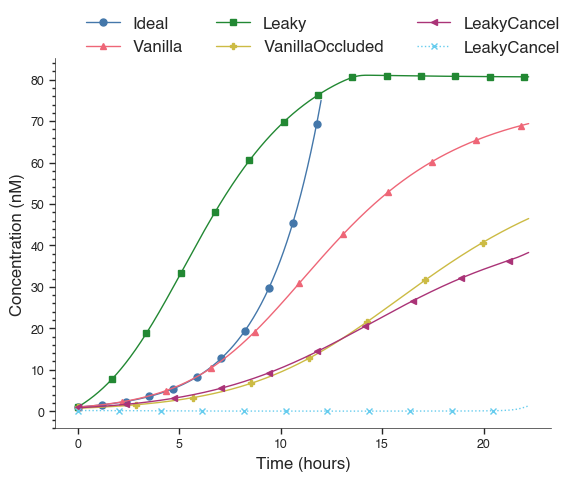

In [221]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (0.15, 1.0), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 1, 'fontsize': 18, 'loc': 'upper left'}

index = 0

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/ideal', 
               x='time', 
               ys={
                   
                   'O': ['O1'],
               },
               labels=['Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid'],
               colors=[MCOLORS[index]],
               markers=[MARKERS[index]],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               legendkwargs=legendkwargs,
               **kwargs)

index += 1
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
               },
               labels=['Vanilla'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid'],
               colors=[MCOLORS[index]],
               markers=[MARKERS[index]],               
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
legendkwargs=legendkwargs,
               **kwargs)

index += 1

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky/plots/leaky', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
               },
               labels=['Leaky'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid'],
               colors=[MCOLORS[index]],
               markers=[MARKERS[index]],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)

index += 1

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/occluded/plots/occluded', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
               },
               labels=['VanillaOccluded'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid'],
               colors=[MCOLORS[index]],
               markers=[MARKERS[index]],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)

index +=1 

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky_shadow/plots/leaky_shadow', 
        x='time', 
        ys={
        'C': ['Cj', 'Ck'],
        },
        labels=['LeakyCancel'],
        xlabel='Time (hours)',
        ylabel='Concentration (nM)',
        linestyles=['solid'],
        colors=MCOLORS[index:],
        markers=MARKERS[index:],
        text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
        legendkwargs=legendkwargs,
        **kwargs
)

index += 1

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky_shadow/plots/leaky_shadow', 
        x='time', 
        ys={
        'shC': ['shCj', 'shCk'],
        },
        labels=['LeakyCancel'],
        xlabel='Time (hours)',
        ylabel='Concentration (nM)',
        linestyles=['dotted'],
       colors=[MCOLORS[index]],
       markers=[MARKERS[index]],
        text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
        legendkwargs=legendkwargs,
        **kwargs
)

plot_savefig(UNIAMP_IMAGES_DIR, name='uniamp_juxtaposed')

## Uniamp Pert Revision

In [222]:
FOLDER = 'uniamp_1em5_pert'
ROOT=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}'
PERT_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/pert/'
PERT_IMAGES_DIR=f'{PERT_DIR}/images'
if not os.path.exists(PERT_IMAGES_DIR):
    os.makedirs(PERT_IMAGES_DIR)

['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

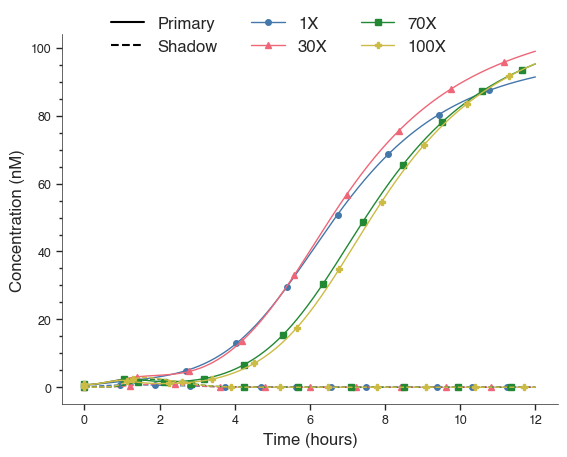

In [223]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'bbox_to_anchor': (0.15, 0.95), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 3, 'fontsize': 12, 'loc': 'upper left'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
folders = ['0', '29', '69', '99']

fig, ax = plt.subplots()
# print(folders)
# df = plot_file_advanced(f'{ROOT}/original/plots/original', 
#            x='time', 
#            ys={
#                'C': ['Cj', 'Ck'],
#            },
#            labels=['1X'],
#            xlabel='Time (hours)',
#            ylabel='Concentration (nM)',
#            linestyles=['solid', 'dashed', '-.'],
#            colors=[MCOLORS[index]]*5,
#            markers=[MARKERS[index]]*5,
#            text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#            legendkwargs=legendkwargs,
#            **kwargs)

plt.plot([], [], label='Primary', linestyle='solid', color='black')
plt.plot([], [], label='Shadow', linestyle='dashed', color='black')
plt.legend(**legendkwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'C': ['Cj', 'Ck'],
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'{INC}X', 
                   '',
                  ],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'dashed', '-.'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, 'uniamp_1em5_pert_juxtaposed')

['0', '29', '69', '99']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

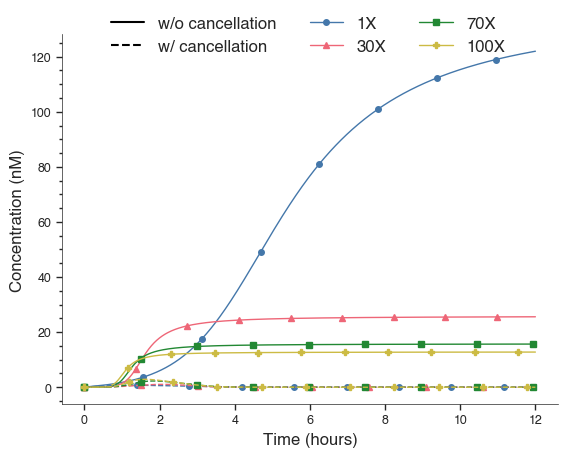

In [224]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}


legendkwargs = {'bbox_to_anchor': (0.15, 0.95), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 3, 'fontsize': 12, 'loc': 'upper left'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
folders = ['0', '29', '69', '99']
fig, ax = plt.subplots()
print(folders)
plt.plot([], [], label='w/o cancellation', linestyle='solid', color='black')
plt.plot([], [], label='w/ cancellation', linestyle='dashed', color='black')
plt.legend(**legendkwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_nocancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'{INC}X'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[''],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['dashed'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, f'{FOLDER}_shadow_noshadow_leak_juxtaposed')

In [225]:
FOLDER = 'uniamp_1em4_pert'
ROOT=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}'
PERT_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/pert/'
PERT_IMAGES_DIR=f'{PERT_DIR}/images'
if not os.path.exists(PERT_IMAGES_DIR):
    os.makedirs(PERT_IMAGES_DIR)

['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

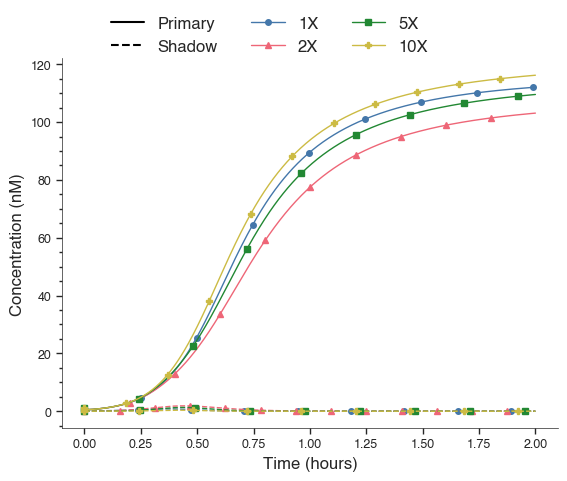

In [226]:

kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'bbox_to_anchor': (0.15, 1.0), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 3, 'fontsize': 12, 'loc': 'upper left'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))

fig, ax = plt.subplots()
plt.plot([], [], label='Primary', linestyle='solid', color='black')
plt.plot([], [], label='Shadow', linestyle='dashed', color='black')
plt.legend(**legendkwargs)

# df = plot_file_advanced(f'{ROOT}/original/plots/original', 
#            x='time', 
#            ys={
#                'C': ['Cj', 'Ck'],
#            },
#            labels=['Ideal'],
#            xlabel='Time (hours)',
#            ylabel='Concentration (nM)',
#            linestyles=['solid', 'dashed', '-.'],
#            colors=[MCOLORS[index]]*5,
#            markers=[MARKERS[index]]*5,
#            text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#            legendkwargs=legendkwargs,
#            **kwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'C': ['Cj', 'Ck'],
               'shC': ['shCj', 'shCk']
           },
           labels=[f'{INC}X', ''],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'dashed'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, 'uniamp_1em4_pert_juxtaposed')

['0', '1', '4', '9']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

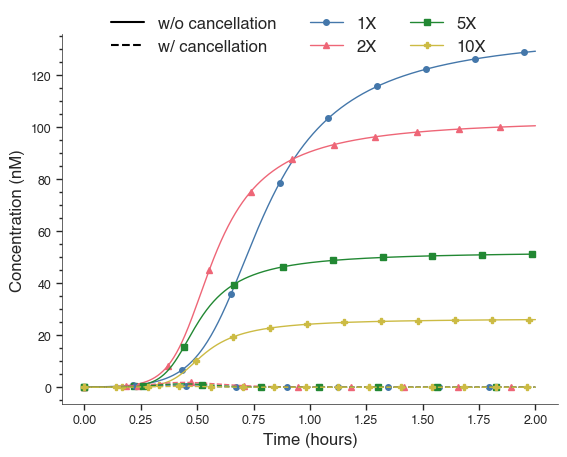

In [227]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'bbox_to_anchor': (0.15, 0.95), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 3, 'fontsize': 12, 'loc': 'upper left'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()
print(folders)

plt.plot([], [], label='w/o cancellation', linestyle='solid', color='black')
plt.plot([], [], label='w/ cancellation', linestyle='dashed', color='black')
plt.legend(**legendkwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_nocancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'{INC}X'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[''],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['dashed'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, f'{FOLDER}_shadow_noshadow_leak_juxtaposed')

In [259]:
FOLDER='uniamp_1em4_pert'
SUBFOLDER='leak_pert'
LEAK_PERT_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/{SUBFOLDER}'
LEAK_PERT_IMAGES_DIR=f'{LEAK_PERT_DIR}/images'
if not os.path.exists(LEAK_PERT_IMAGES_DIR):
    os.makedirs(LEAK_PERT_IMAGES_DIR)


['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

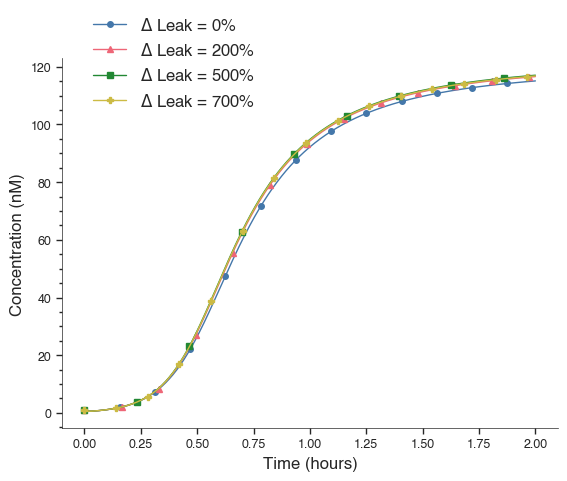

In [260]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'bbox_to_anchor': (0.15, 1.0), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 1, 'fontsize': 12, 'loc': 'upper left'}

folders = ['0', '200', '500', '700']

for index, LEAK in enumerate(folders):#, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'{LEAK_PERT_DIR}/{LEAK}/plots/orig_shadow_cancel', 
           x='time', 
           ys={
               'C': ['Cj', 'Ck'], 
           },
           labels=[f'$\Delta$ Leak = {LEAK}%'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           markers=[MARKERS[index]],
           colors=[MCOLORS[index]],
           legendkwargs=legendkwargs,
           **kwargs)
plot_savefig(LEAK_PERT_IMAGES_DIR, f'uniamp_leakactivity_leak_pert')

['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

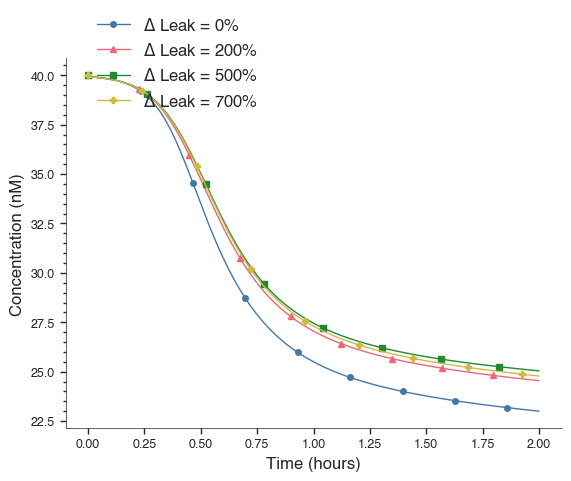

In [263]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'bbox_to_anchor': (0.15, 1.0), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 1, 'fontsize': 12, 'loc': 'upper left'}

folders = ['0', '200', '500', '700']

for index, LEAK in enumerate(folders):#, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'{LEAK_PERT_DIR}/{LEAK}/plots/orig_shadow_cancel', 
           x='time', 
           ys={
               'CancelC': ['CancelC'], 
           },
           labels=[f'$\Delta$ Leak = {LEAK}%'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           markers=[MARKERS[index]],
           colors=[MCOLORS[index]],
           legendkwargs=legendkwargs,
           **kwargs)
plot_savefig(LEAK_PERT_IMAGES_DIR, f'uniamp_1em4_leakpert_cancel_{LEAK}')

['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

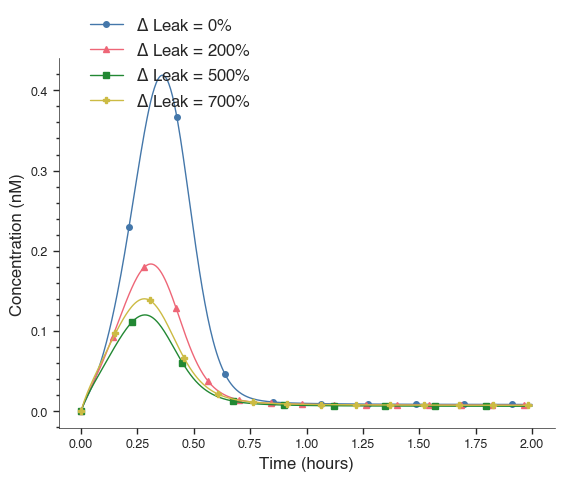

In [264]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'bbox_to_anchor': (0.15, 1.0), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 1, 'fontsize': 12, 'loc': 'upper left'}

folders = ['0', '200', '500', '700']

for index, LEAK in enumerate(folders):#, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'{LEAK_PERT_DIR}/{LEAK}/plots/orig_shadow_cancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'], 
           },
           labels=[f'$\Delta$ Leak = {LEAK}%'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           markers=[MARKERS[index]],
           colors=[MCOLORS[index]],
           legendkwargs=legendkwargs,
           **kwargs)
plot_savefig(LEAK_PERT_IMAGES_DIR, f'uniamp_1em4_leakpert_leak_{LEAK}')

# Biamp

In [230]:
FOLDER='biamp'
BIAMP_IMAGES_DIR='/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/images'

['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br']
['time', 'Cj', 'Ck', 'Br']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

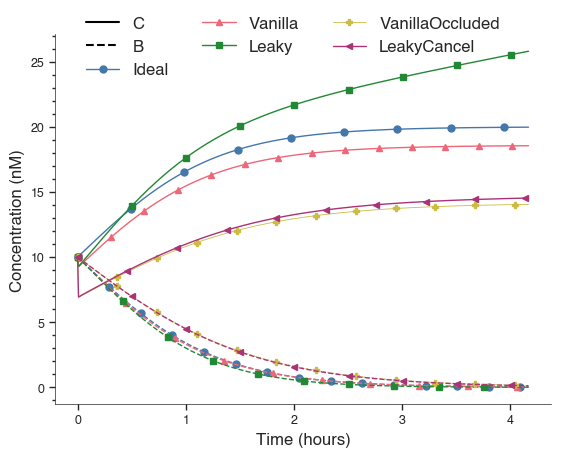

In [231]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (0.15, 0.95), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 3, 'fontsize': 12, 'loc': 'upper left'}
plt.plot([], [], label='C', linestyle='solid', color='black')
plt.plot([], [], label='B', linestyle='dashed', color='black')
plt.legend(**legendkwargs)

index = 0

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'O1': ['O1'],
                   'O2': ['O2'],
               },
               labels=['Ideal', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               legendkwargs=legendkwargs,
               **kwargs)
index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br']
               },
               labels=['Vanilla', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
            legendkwargs=legendkwargs,
               **kwargs)
index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky/plots/leaky', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['Leaky', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                        legendkwargs=legendkwargs,
               **kwargs)
index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/occluded/plots/occluded', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['VanillaOccluded', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[index]]*2,
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               name='occluded',
               **{
                    'markersize': 5, 
                    'markevery': 30,
                    'linewidth': 0.6
                 })
index +=1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['LeakyCancel', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               name='leaky_shadow',
               **kwargs)
index += 1
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
#                x='time', 
#                 ys={
#                    'shC': ['shCj', 'shCk'],
#                    'shB': ['shBr'],
#                },
#                labels=['LeakyCancel', ''],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',

#                linestyles=['dotted', 'dotted'],
#                colors=[MCOLORS[index]]*2,
#                markers=[MARKERS[index]]*2,
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                 legendkwargs=legendkwargs,
#                name='leaky_shadow',
#                **kwargs)

plot_savefig(BIAMP_IMAGES_DIR, 'biamp_juxtaposed')

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

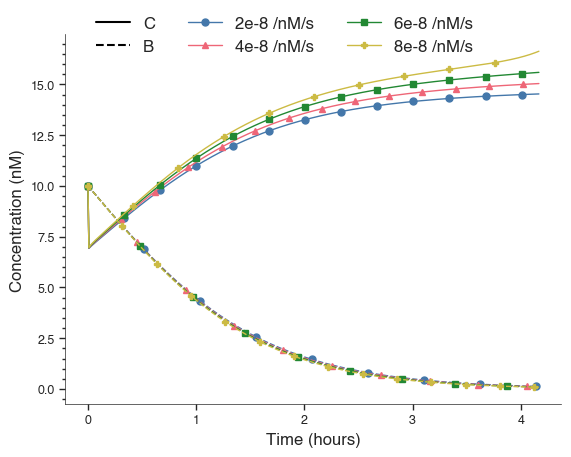

In [232]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (0.15, 0.95), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 3, 'fontsize': 12, 'loc': 'upper left'}
plt.plot([], [], label='C', linestyle='solid', color='black')
plt.plot([], [], label='B', linestyle='dashed', color='black')
plt.legend(**legendkwargs)

index = 0
marker_index = 0

for i in range(2, 9, 2):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow_{i}e-8', 
                   x='time', 
                   ys={
                       'C': ['Cj', 'Ck'],
                       'B': ['Br']
                   },
                   labels=[f'{i}e-8 /nM/s', ''],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'dashed'],
                   colors=[MCOLORS[index]]*2,
                   markers=[MARKERS[marker_index]]*2,
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
    
    index += 1
    marker_index += 1
plot_savefig(BIAMP_IMAGES_DIR, 'biamp_leaky_shadow_moreleak_juxtaposed')

In [233]:
FOLDER='biamp_weaktoes' # weakening the toehold bindings
BIAMP_WEAKTOES_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'


['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

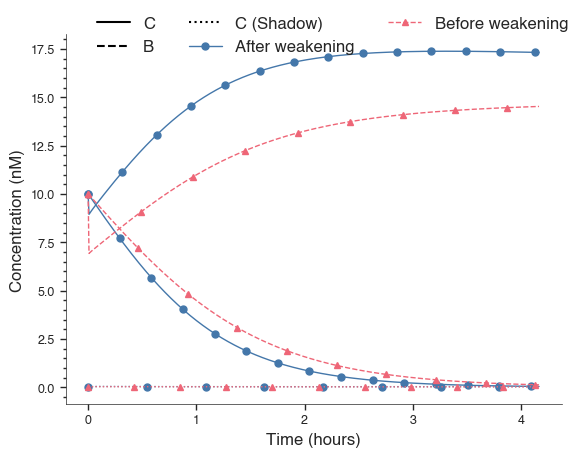

In [234]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (0.15, 0.95), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 3, 'fontsize': 12, 'loc': 'upper left'}
plt.plot([], [], label='C', linestyle='solid', color='black')
plt.plot([], [], label='B', linestyle='dashed', color='black')
plt.plot([], [], label='C (Shadow)', linestyle='dotted', color='black')
plt.legend(**legendkwargs)

index = 0
marker_index = 0



df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['After weakening', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'shC': ['shCj', 'shCk'],
               },
               labels=['',],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dotted'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['Before weakening', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)


df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'shC': ['shCj', 'shCk'],
               },
               labels=[''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dotted'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(BIAMP_WEAKTOES_IMAGES_DIR, 'biamp_weaktoes_juxtaposed')

# RPS V2

In [235]:
REG_FOLDER='rps_v2'
RPS_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/images'
legendkwargs = {'ncols': 1, 'fontsize': 18, 'loc': 'upper right'}

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

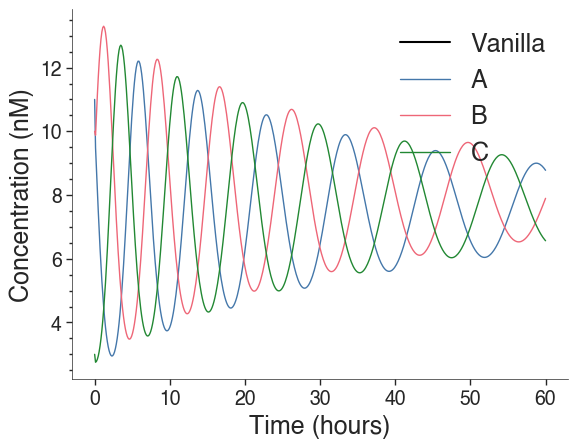

In [236]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}

plt.plot([], [], label='Vanilla', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='original',
               markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

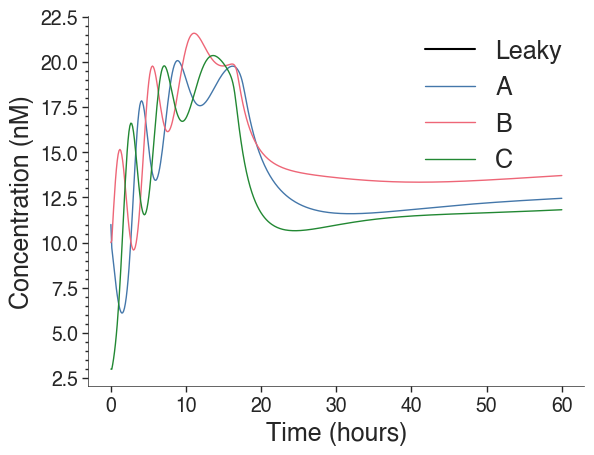

In [237]:
plt.plot([], [], label='Leaky', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='original',
               markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

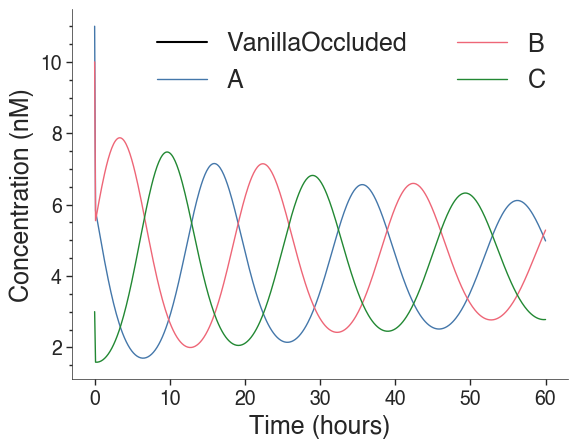

In [241]:
plt.plot([], [], label='VanillaOccluded', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
    
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'occluded')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

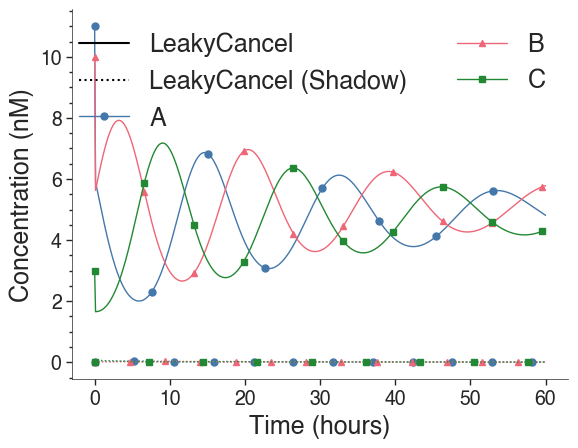

In [239]:
legendkwargs = {'ncols': 2, 'fontsize': 18, 'loc': 'best'}
plt.plot([], [], label='LeakyCancel', linestyle='solid', color='black')
plt.plot([], [], label='LeakyCancel (Shadow)', linestyle='dotted', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
              x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],
               },
               labels=['A', 'B', 'C', 
                       '', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
               colors=MCOLORS[:3]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=MARKERS[:3] + MARKERS[:3],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky_shadow')

In [215]:
REG_FOLDER='rps_v2_weaktoes'
RPS_WEAKTOES_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/images'
legendkwargs = {'ncols': 4, 'fontsize': 12, 'loc': 'best'}

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

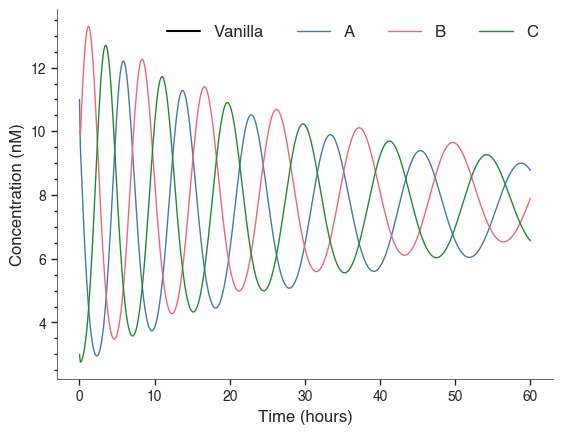

In [137]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
plt.plot([], [], label='Vanilla', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='original',
               markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_WEAKTOES_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

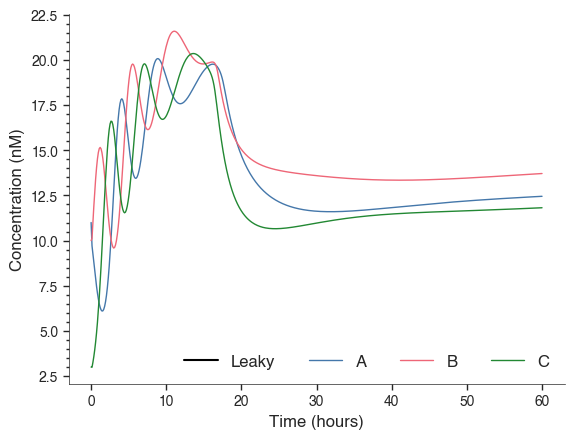

In [139]:
plt.plot([], [], label='Leaky', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='original',
               markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_WEAKTOES_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

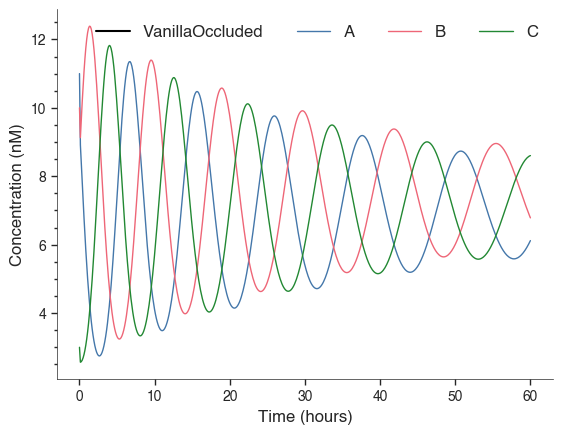

In [141]:
plt.plot([], [], label='VanillaOccluded', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='original',
               markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_WEAKTOES_IMAGES_DIR, 'occluded')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

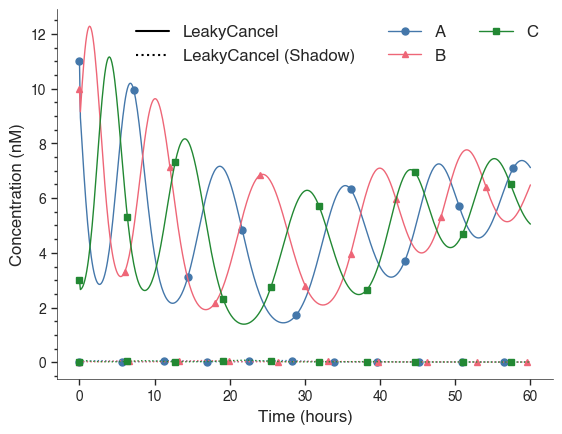

In [143]:
legendkwargs = {'ncols': 3, 'fontsize': 12, 'loc': 'best'}
plt.plot([], [], label='LeakyCancel', linestyle='solid', color='black')
plt.plot([], [], label='LeakyCancel (Shadow)', linestyle='dotted', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
             x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],
               },
               labels=['A', 'B', 'C', 
                       '', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
               colors=MCOLORS[:3]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=MARKERS[:3] + MARKERS[:3],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_WEAKTOES_IMAGES_DIR, 'leaky_shadow')

In [149]:
REG_FOLDER='rps_v2_nobuffer'
RPS_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/images'
legendkwargs = {'ncols': 4, 'fontsize': 12, 'loc': 'best'}

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

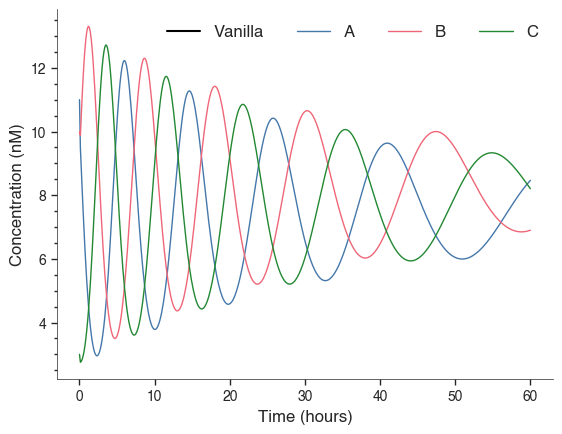

In [152]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
plt.plot([], [], label='Vanilla', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[],
                legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

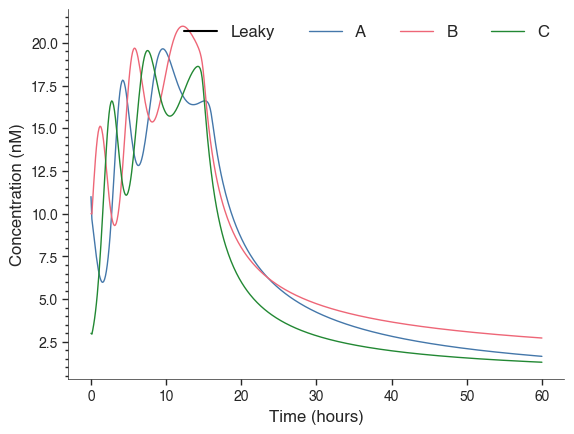

In [153]:
plt.plot([], [], label='Leaky', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[],
                legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

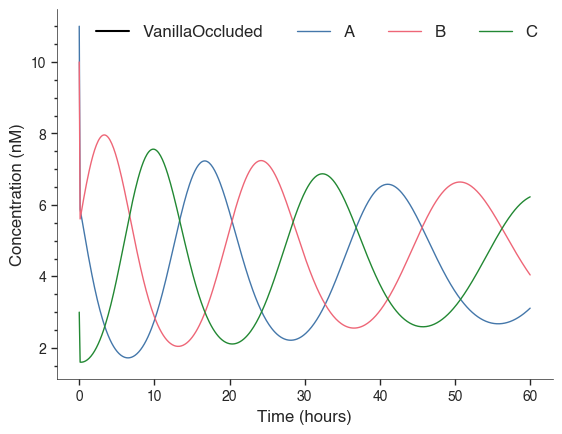

In [154]:
plt.plot([], [], label='VanillaOccluded', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   
               },
               labels=['A', 'B', 'C'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[],
                legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'occluded')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

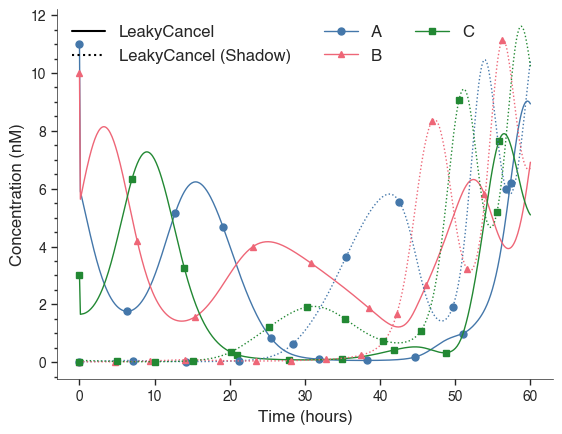

In [157]:
legendkwargs = {'ncols': 3, 'fontsize': 12, 'loc': 'best'}
plt.plot([], [], label='LeakyCancel', linestyle='solid', color='black')
plt.plot([], [], label='LeakyCancel (Shadow)', linestyle='dotted', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
             x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],
               },
               labels=['A', 'B', 'C', 
                       '', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
               colors=MCOLORS[:3]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=MARKERS[:3] + MARKERS[:3],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky_shadow')

## Toehold Occlusion

In [29]:
FOLDER='rps_v2'
SUBFOLDER = 'leaky_shadow_toeocc'
RPS_TOEOCC_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/images/'
if not os.path.exists(RPS_TOEOCC_IMAGES_DIR):
    os.makedirs(RPS_TOEOCC_IMAGES_DIR)
    
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_40nM png and jpg


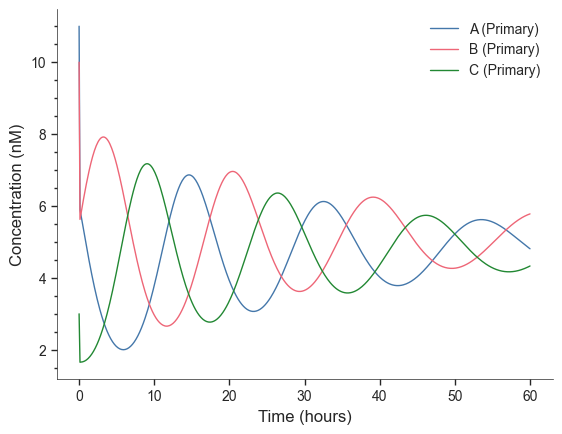

In [30]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_60nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_40nM',
               markers=[],
               **kwargs)
plot_savefig(RPS_TOEOCC_IMAGES_DIR, 'leaky_shadow_toeocc_60nM')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_100nM png and jpg


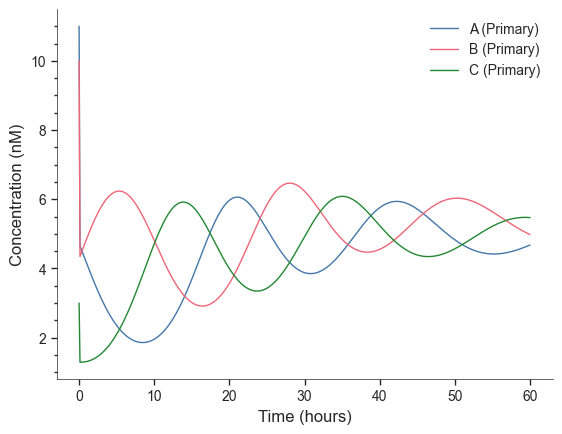

In [31]:
CANCEL='100'
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/main_cancel_{CANCEL}nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name=f'leaky_shadow_toeocc_{CANCEL}nM',
               markers=[],
               **kwargs)
plot_savefig(RPS_TOEOCC_IMAGES_DIR, f'leaky_shadow_toeocc_{CANCEL}nM')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_300nM png and jpg


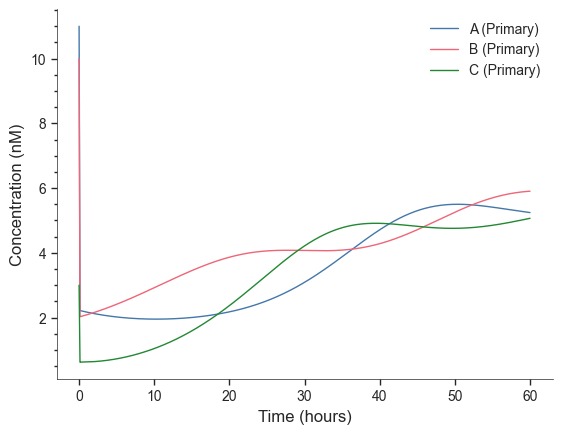

In [32]:

CANCEL='300'
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/main_cancel_{CANCEL}nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name=f'leaky_shadow_toeocc_{CANCEL}nM',
               markers=[],
               **kwargs)
plot_savefig(RPS_TOEOCC_IMAGES_DIR, f'leaky_shadow_toeocc_{CANCEL}nM')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_600nM png and jpg


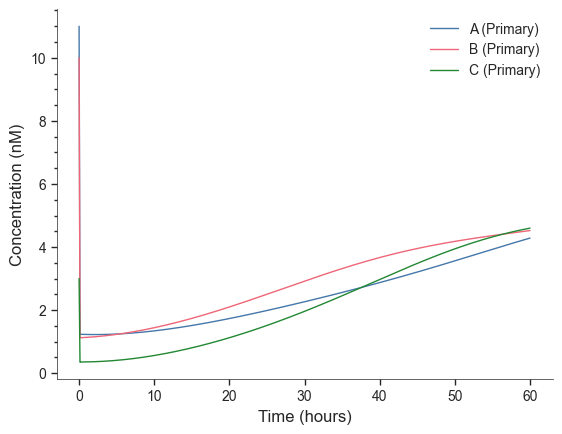

In [33]:
CANCEL='600'
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/main_cancel_{CANCEL}nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name=f'leaky_shadow_toeocc_{CANCEL}nM',
               markers=[],
               **kwargs)
plot_savefig(RPS_TOEOCC_IMAGES_DIR, f'leaky_shadow_toeocc_{CANCEL}nM')

In [34]:
REG_FOLDER='rps_v2'
RPS_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/images'

In [35]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
for i in range(2, 9, 2):
    
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow_{i}e-8', 
                   x='time', 
                   ys={
                       'A': ['Ap', 'Aq'],
                       'B': ['Br', 'Bs'],
                       'C': ['Cj', 'Ck'],
                       'shA': ['shAp', 'shAq'],
                       'shB': ['shBr', 'shBs'],
                       'shC': ['shCj', 'shCk']
                   },
                   labels=['A (Primary; LeakyCancel)', 'B (Primary; LeakyCancel)', 'C (Primary; LeakyCancel)',
                          'shA (Shadow; LeakyCancel)', 'shB (Shadow; LeakyCancel)', 'shC (Shadow; LeakyCancel)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   markers=['', '', ''] + MARKERS[:3],
                   **kwargs)
    plot_savefig(RPS_IMAGES_DIR, f'leaky_shadow_{i}e-8')
    plt.clf()

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


<Figure size 640x480 with 0 Axes>

# Consensus

In [162]:
FOLDER='con_v3'
CON_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'
if not os.path.exists(CON_IMAGES_DIR):
    os.mkdir(CON_IMAGES_DIR)

kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}



['time', 'OA', 'OB', 'OY']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

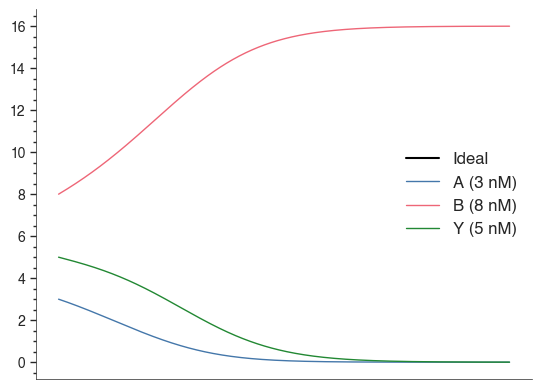

In [164]:
legendkwargs = {'ncols': 1, 'fontsize': 12, 'loc': 'best'}
plt.plot([], [], label='Ideal', linestyle='solid', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/ideal', 
               x='time', 
               ys={
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)'],
               xlabel='',
               ylabel='',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
# plt.legend().set_visible(False)
plt.xticks([])
# plt.yticks([])
plot_savefig(CON_IMAGES_DIR, 'ideal')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

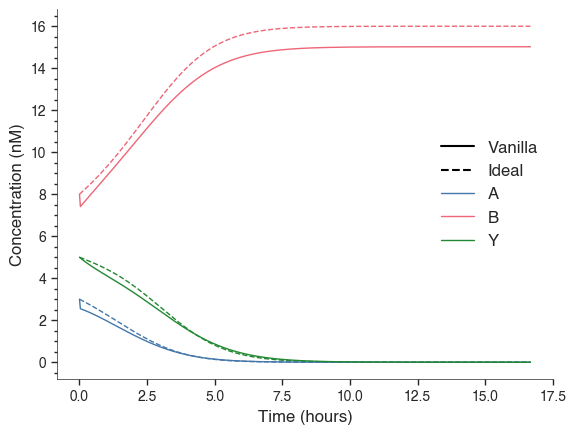

In [172]:
legendkwargs = {'ncols': 1, 'fontsize': 12, 'loc': 'best'}
plt.plot([], [], label='Vanilla', linestyle='solid', color='black')
plt.plot([], [], label='Ideal', linestyle='dashed', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                    'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               colors=MCOLORS[:3]*2,
                markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=[ 'A', 'B', 'Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                colors=MCOLORS[:3]*2,
                markers=[],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

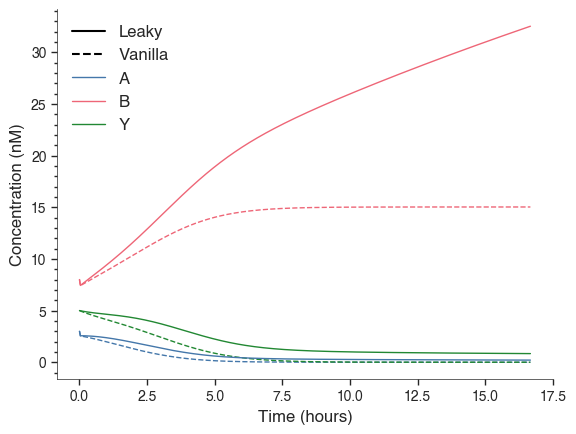

In [173]:
legendkwargs = {'ncols': 1, 'fontsize': 12, 'loc': 'best'}
plt.plot([], [], label='Leaky', linestyle='solid', color='black')
plt.plot([], [], label='Vanilla', linestyle='dashed', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[],
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A', 'B', 'Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[],
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'shAp', 'shAq', 'shBr', 'shBs', 'shYi', 'shYj']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

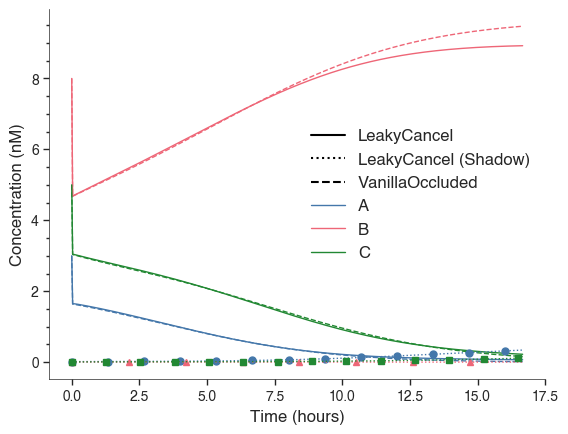

In [183]:
legendkwargs = {'ncols': 1, 'fontsize': 12, 'loc': 'best'}
plt.plot([], [], label='LeakyCancel', linestyle='solid', color='black')
plt.plot([], [], label='LeakyCancel (Shadow)', linestyle='dotted', color='black')
plt.plot([], [], label='VanillaOccluded', linestyle='dashed', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'dashed'],
               colors=MCOLORS[:3],
               markers=[],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shY': ['shYi', 'shYj'],
               },
               labels=['A', 'B', 'C', '', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
               colors=MCOLORS[:3] + MCOLORS[:3],
               markers=['', '', ''] + MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

plot_savefig(CON_IMAGES_DIR, 'leaky_shadow')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

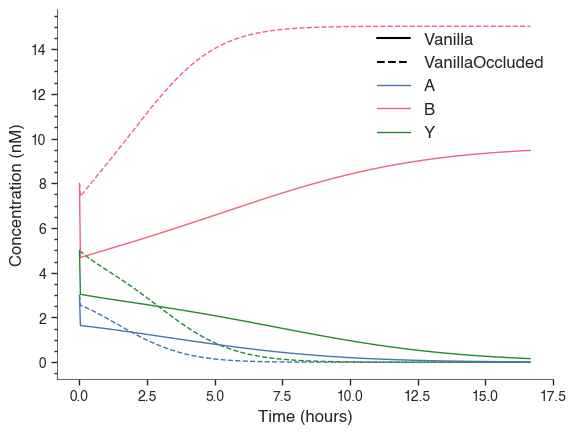

In [200]:
legendkwargs = {'bbox_to_anchor': (0.91, 0.72), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 1, 'fontsize': 12, 'loc': 'right'}
plt.plot([], [], label='Vanilla', linestyle='solid', color='black')
plt.plot([], [], label='VanillaOccluded', linestyle='dashed', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'dashed'],
               markers=[],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A', 'B', 'Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               markers=[],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'occluded')

# Perturbation

In [26]:
FOLDER='rps_v2_pert'
RPS_PERT_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/images'

if not os.path.exists(RPS_PERT_IMAGES_DIR):
    os.makedirs(RPS_PERT_IMAGES_DIR)

    
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/original/plots/rps_v2_pert_original png and jpg


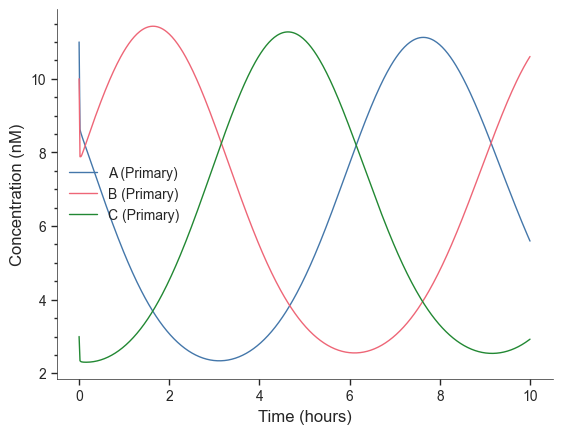

In [27]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_v2_pert_original',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_v2_pert_original')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_original_shadow_pert-1X_cancel png and jpg


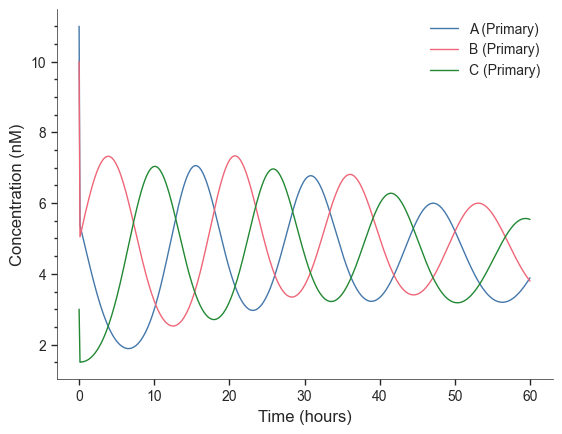

In [28]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
#                    'cancel': ['CancelC']
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)', 'CancelC'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-1X_cancel')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_original_shadow_pert-2X_cancel png and jpg


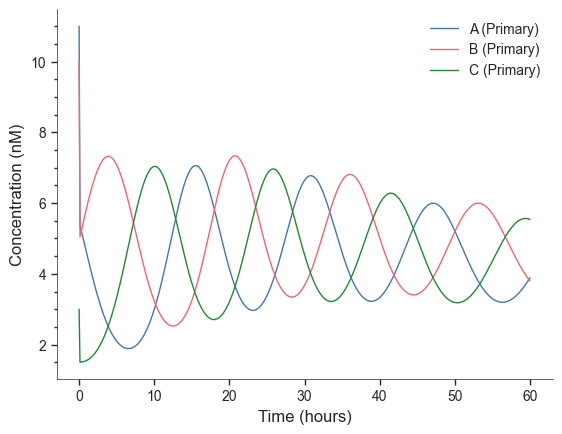

In [29]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-2X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-2X_cancel')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_original_shadow_pert-5X_cancel png and jpg


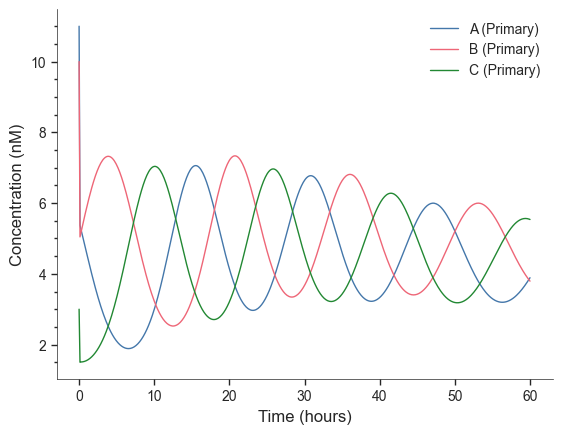

In [30]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-5X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-5X_cancel')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_original_shadow_pert-10X_cancel png and jpg


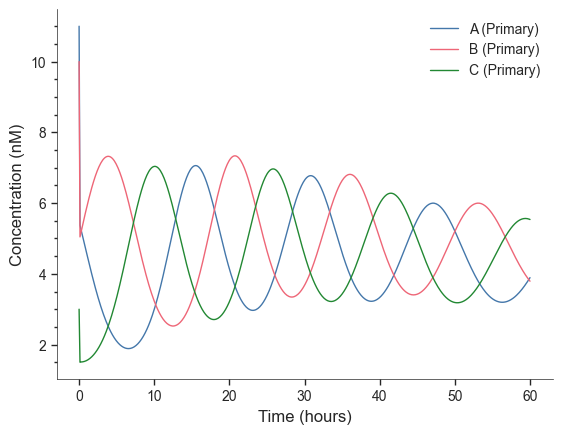

In [31]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
#                    'Cancel': ['shAp', 'shAq']
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-10X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-10X_cancel')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/19/plots/rps_original_shadow_pert-20X_cancel png and jpg


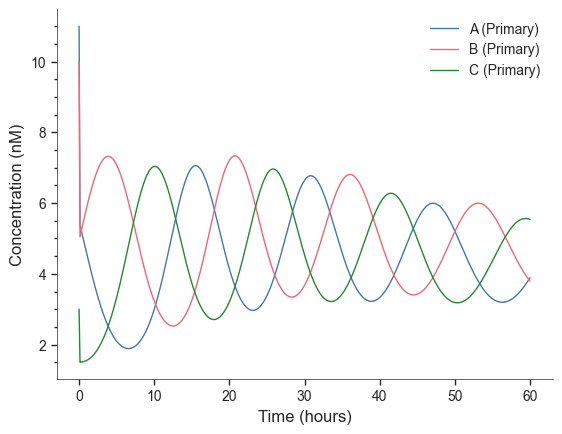

In [32]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/19/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
#                    'Cancel': ['shAp', 'shAq']
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-20X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-20X_cancel')

In [ ]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/39/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
#                    'Cancel': ['shAp', 'shAq']
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-40X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-40X_cancel')

### Leaks under Perturbation and Shadow Cancellation

Here, we measure the leak in different cases of Perturbation with and without shadow cancellation. This shows that while in the absence of shadow cancellation the leak is amplified exponentially, in the presence of shadow cancellation, the leak is amplified subexponentially. This can be captured by the behavior of the shadow signal strands. 

In [48]:
kwargs = {
    'markersize': 5, 
    'markevery': 40,
    'linewidth': 1
}

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_nocancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_nocancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_orig_shadow_pert_nocancel_zeroconc png and jpg


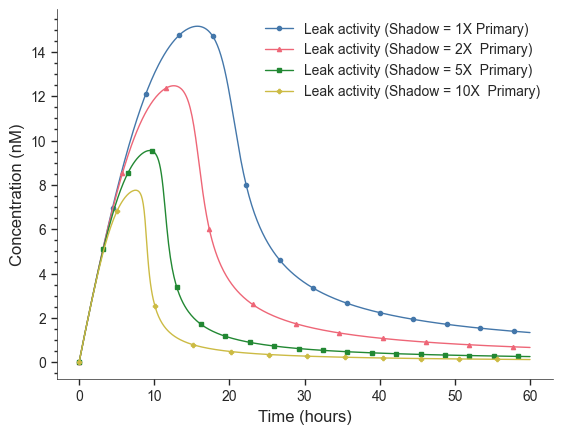

In [49]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '1', '4', '9']
labels = ['1X', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak activity (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name='rps_orig_shadow_pert_nocancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_orig_shadow_pert_nocancel_zeroconc')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_orig_shadow_pert_cancel_zeroconc png and jpg


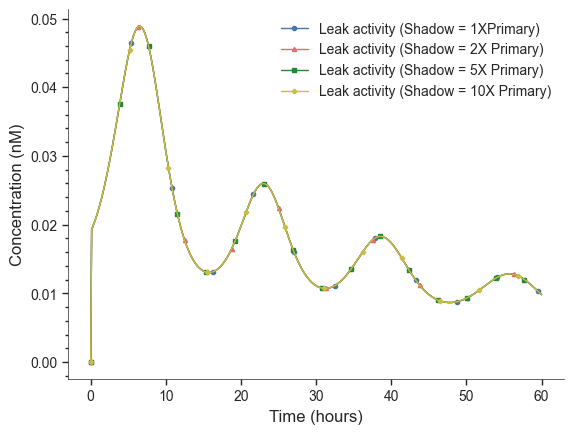

In [50]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '1', '4', '9']
labels = [ '1X', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak activity (Shadow = {labels[index]}Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name=f'rps_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_orig_shadow_pert_cancel_zeroconc')

## Plot combined

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck

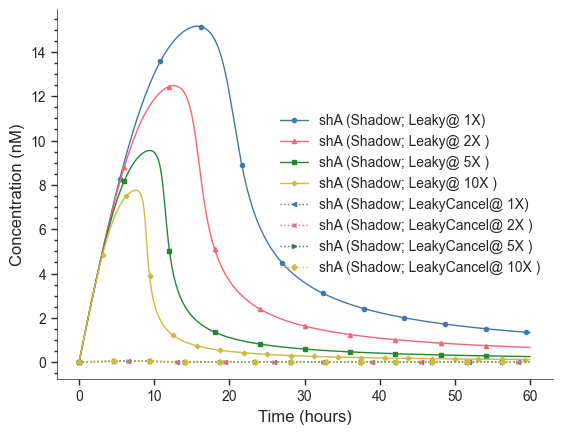

In [51]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '1', '4', '9']
labels = ['1X', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 1, 'loc':'center right', 'fontsize':'medium'}
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shA (Shadow; Leaky@ {labels[index]})'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name='rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs_copy = kwargs.copy()
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shA (Shadow; LeakyCancel@ {labels[index]})'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dotted'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[len(perts) + index]],
                   name=f'rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs_copy)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_orig_shadow_pert_nocancel_cancel_combined')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_orig_shadow_pert_cancel_10X_withprimary png and jpg


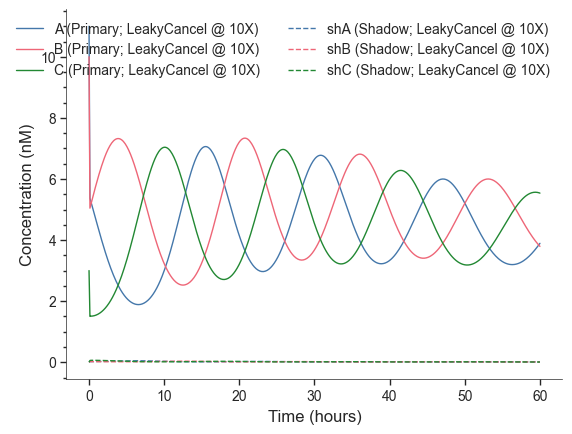

In [52]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['9']
labels = ['10X']
legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize':'medium'}

X = 'time'

Ys = {
        'A': ['Ap', 'Aq'],
        'B': ['Br', 'Bs'],
        'C': ['Cj', 'Ck'],
        'shA': ['shAp', 'shAq'],
        'shB': ['shBr', 'shBs'],
        'shC': ['shCj', 'shCk']
     }
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} (Primary; LeakyCancel @ {labels[index]})' for y in list(Ys.keys())[:3]] + 
                            [f'{y} (Shadow; LeakyCancel @ {labels[index]})' for y in list(Ys.keys())[3:]],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'], 
                   colors=MCOLORS[:3]*2,
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, f'rps_orig_shadow_pert_cancel_{labels[0]}_w_shadow')

#### Appendix for Rate perturbation

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


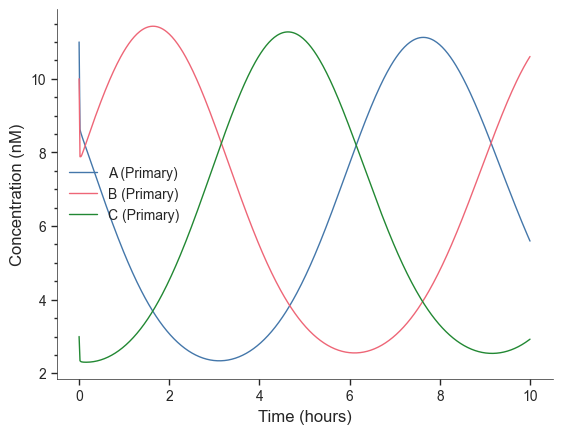

In [53]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'appendix_rps_v2_original')

['time', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


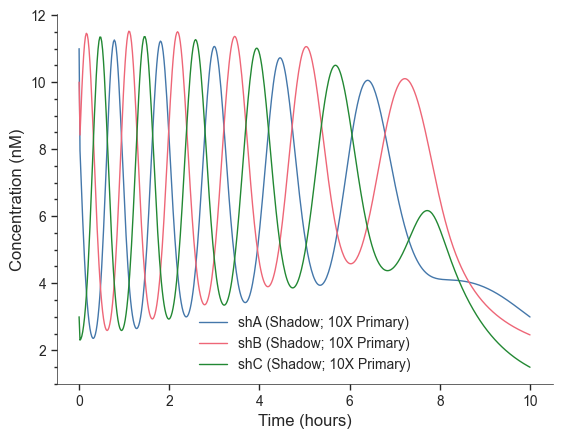

In [54]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/shadow/plots/main_pert-9', 
               x='time', 
               ys={
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],
               },
               labels=['shA (Shadow; 10X Primary)', 'shB (Shadow; 10X Primary)', 'shC (Shadow; 10X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'appendix_rps_v2_shadow_10X')

## BIAMP Perturbation Experiments

In [55]:
FOLDER = 'biamp_pert'
BIAMP_PERT_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/images/'
if not os.path.exists(BIAMP_PERT_IMAGES_DIR):
    os.makedirs(BIAMP_PERT_IMAGES_DIR)
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']


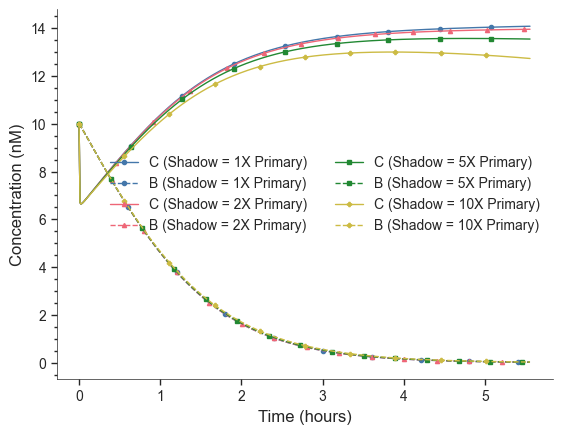

In [56]:

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'medium'}

index = 0
marker_index = 0

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br']
               },
               labels=['C (Shadow = 1X Primary)', 'B (Shadow = 1X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
            legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Shadow = 2X Primary)', 'B (Shadow = 2X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)
index +=1
marker_index += 1

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Shadow = 5X Primary)', 'B (Shadow = 5X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Shadow = 10X Primary)', 'B (Shadow = 10X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',

               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=MARKERS[marker_index]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)

plot_savefig(BIAMP_PERT_IMAGES_DIR, 'biamp_pert_juxtaposed')

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/0_0/plots/biamp_orig_shadow_pert_nocancel png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/1/plots/biamp_orig_shadow_pert_nocancel png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/4/plots/biamp_orig_shadow_pert_nocancel png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/9/plots/biamp_orig_shadow_pert_nocancel png and jpg


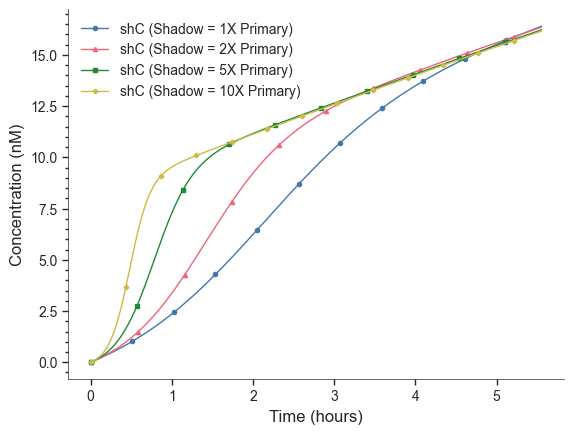

In [57]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
perts = ['0_0', '1', '4', '9']
labels = ['1X', '2X', '5X', '10X']
dfs_nocancel = []
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name='biamp_orig_shadow_pert_nocancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)
    
plot_savefig(BIAMP_PERT_IMAGES_DIR, 'orig_shadow_pert_nocancel')

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/0_0/plots/biamp_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/1/plots/biamp_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/4/plots/biamp_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/9/plots/biamp_orig_shadow_pert_cancel_zeroconc png and jpg


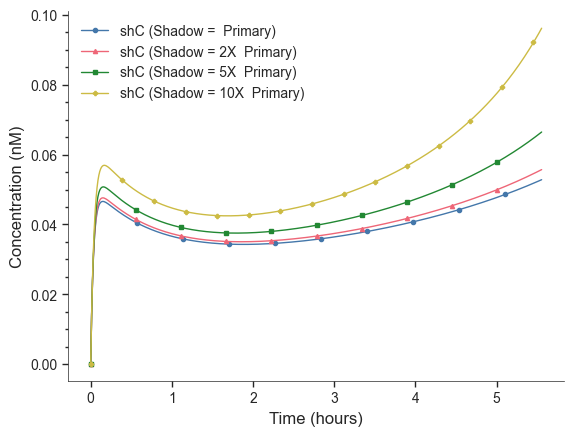

In [58]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
perts = ['0_0', '1', '4', '9']
labels = ['', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name=f'biamp_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)
plot_savefig(BIAMP_PERT_IMAGES_DIR, 'orig_shadow_pert_cancel_zeroconc')

# Plot combined

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/0_0/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/1/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/4/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/9/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/0_0/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', '

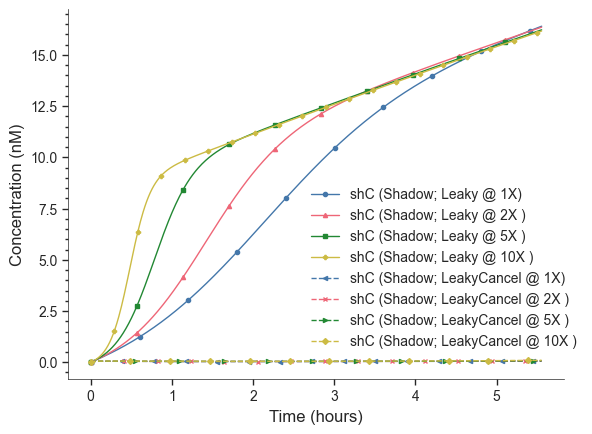

In [59]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
perts = ['0_0', '1', '4', '9']
labels = ['1X', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 1, 'loc':'center right', 'fontsize':'medium', 'bbox_to_anchor': (1.05, 0.3)}
for index, pert in enumerate(perts):
    kwargs_copy = kwargs.copy()
    kwargs_copy['markevery'] -= random.randint(0, 10)
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow; Leaky @ {labels[index]})'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name='biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs_copy)
for index, pert in enumerate(perts):
    kwargs_copy = kwargs.copy()
    kwargs_copy['markevery'] -= random.randint(0, 10)
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow; LeakyCancel @ {labels[index]})'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[len(perts) + index]],
                   name=f'biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs_copy)
plot_savefig(BIAMP_PERT_IMAGES_DIR, 'orig_shadow_pert_nocancel_cancel_combined')

#### Appendix Rate Perturbation

['time', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br']


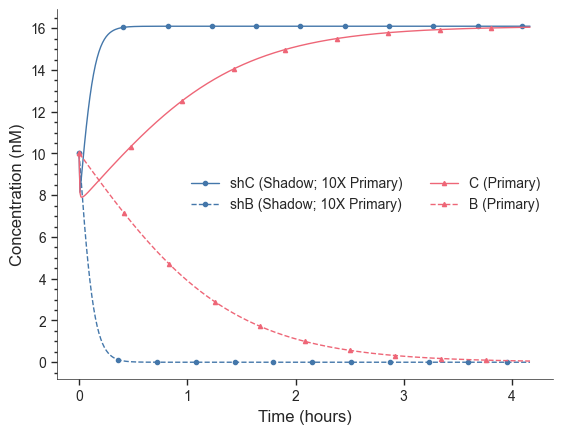

In [60]:

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'medium'}

index = 0
marker_index = 0

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/shadow/plots/main_pert-9', 
               x='time', 
               ys={
                   'shC': ['shCj', 'shCk'],
                   'shB': ['shBr']
               },
               labels=['shC (Shadow; 10X Primary)', 'shB (Shadow; 10X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
            legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Primary)', 'B (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)

plot_savefig(BIAMP_PERT_IMAGES_DIR, 'appendix_biamp_pert_original_shadow_juxtaposed')

## Revision

In [146]:
FOLDER = 'biamp_1em5_pert'
PERT_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/pert/'
PERT_IMAGES_DIR=f'{PERT_DIR}/images'
if not os.path.exists(PERT_IMAGES_DIR):
    os.makedirs(PERT_IMAGES_DIR)

['0', '9', '19', '29', '39', '49', '59', '69', '79', '89', '99']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

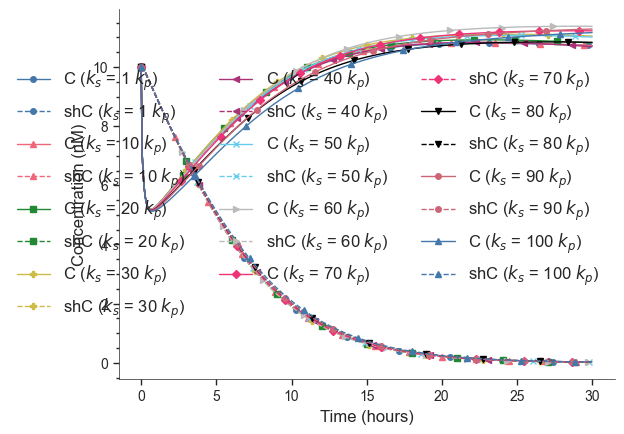

In [149]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'ncols': 3, 'loc':'best', 'fontsize': 'large'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()
print(folders)
for index, folder in enumerate(['0', '9', '19', '29', '39', '49', '59', '69', '79', '89', '99']):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time',
           ys={
               'C': ['Cj', 'Ck'],
#                'shC': ['shCj', 'shCk'],
               'Br': ['Br']
           },
           labels=[f'C ($k_s$ = {INC} $k_p$)', 
                   f'shC ($k_s$ = {INC} $k_p$)', 
                   f'Br'
                  ],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'dashed', '-.'],
           colors=[MCOLORS[index]]*3,
           markers=[MARKERS[index]]*3,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, 'biamp_1em5_pert_juxtaposed')

['0', '9', '19', '29', '39', '49', '59', '69', '79', '89', '99']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'C

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

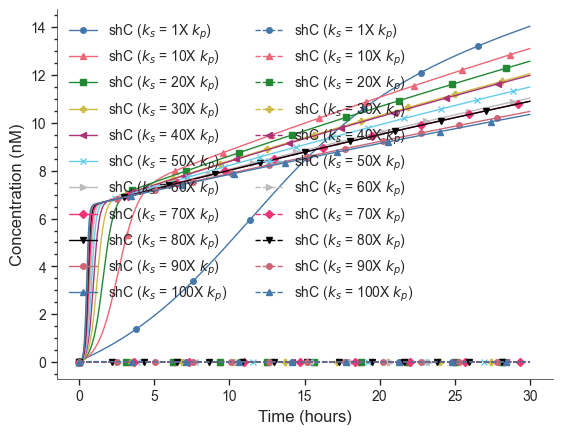

In [148]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'medium'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()
print(folders)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_nocancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['dashed'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, f'{FOLDER}_shadow_noshadow_leak_juxtaposed')

## BIAMP_1em4_Pert

In [150]:
FOLDER = 'biamp_1em4_pert'
PERT_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/pert/'
PERT_IMAGES_DIR=f'{PERT_DIR}/images'
if not os.path.exists(PERT_IMAGES_DIR):
    os.makedirs(PERT_IMAGES_DIR)

['0', '1', '4', '9']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

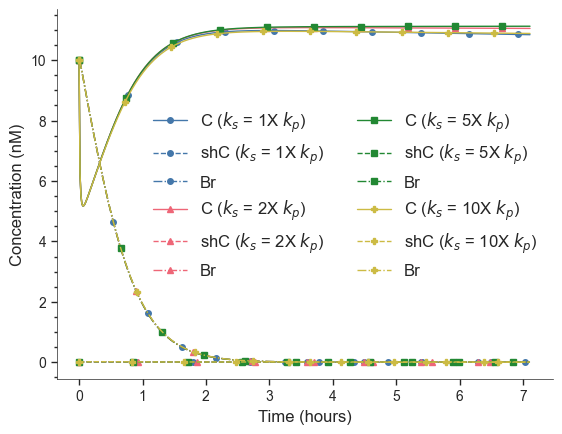

In [151]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'large'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()
print(folders)
for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'C': ['Cj', 'Ck'],
               'shC': ['shCj', 'shCk'],
#                'Helper': ['HelperCCk'],
#                'CancelC': ['CancelC'],
               'Br': ['Br']
           },
           labels=[f'C ($k_s$ = {INC}X $k_p$)', 
                   f'shC ($k_s$ = {INC}X $k_p$)', 
#                    f'HelperCCk ($k_s$ = {INC}X $k_p$)', 
#                    f'CancelC ($k_s$ = {INC}X $k_p$)',
                   f'Br'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'dashed', 'dashdot'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, 'biamp_1em4_pert_juxtaposed')

['0', '1', '4', '9']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br', 'shBr']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

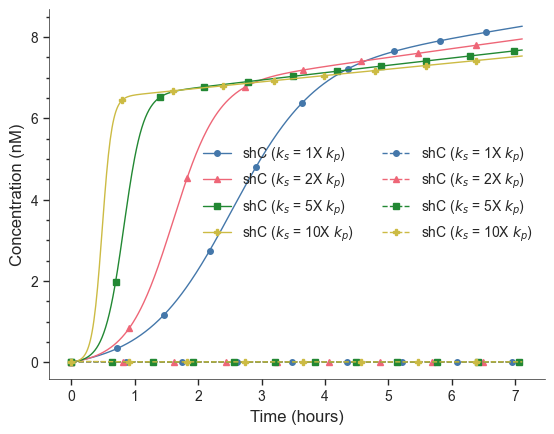

In [152]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'medium'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()
print(folders)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_nocancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['dashed'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, f'{FOLDER}_shadow_noshadow_leak_juxtaposed')

##### Leak pert

In [74]:
FOLDER='biamp_1em4_pert'
SUBFOLDER='leak_pert'
LEAK_PERT_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/{SUBFOLDER}'
LEAK_PERT_IMAGES_DIR=f'{LEAK_PERT_DIR}/images'
if not os.path.exists(LEAK_PERT_IMAGES_DIR):
    os.makedirs(LEAK_PERT_IMAGES_DIR)


['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'Br']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

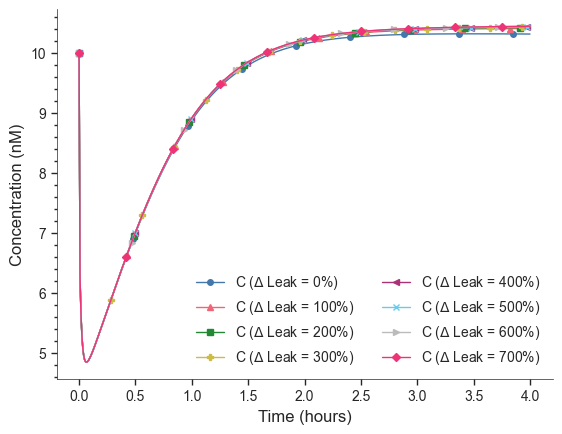

In [75]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {
    'ncols': 2,
    'loc': 'best',
    'fontsize': 'medium'
}
for index, LEAK in enumerate([0, 100, 200, 300, 400, 500, 600, 700]):#, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'{LEAK_PERT_DIR}/{LEAK}/plots/orig_shadow_cancel', 
           x='time', 
           ys={
               'C': ['Cj', 'Ck'], 
#                'B': ['Br'],
#                'shC': ['shCj', 'shCk']
           },
           labels=[f'C ($\Delta$ Leak = {LEAK}%)', f'B', f'shC'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'dashdot', 'dashed'],
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           markers=[MARKERS[index]]*3,
           colors=[MCOLORS[index]]*3,
           legendkwargs=legendkwargs,
           **kwargs)
plot_savefig(LEAK_PERT_IMAGES_DIR, f'biamp_1em4_leak_pert_combined')

## Biamp 1em3

In [93]:
ROOT='/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision'
FOLDER='uniamp_1em3'
BIAMP_IMAGES_DIR=f'{ROOT}/{FOLDER}/images'

['time', 'Cj', 'Ck']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/uniamp_1em3/leaky_shadow/plots/leaky_shadow png and jpg


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

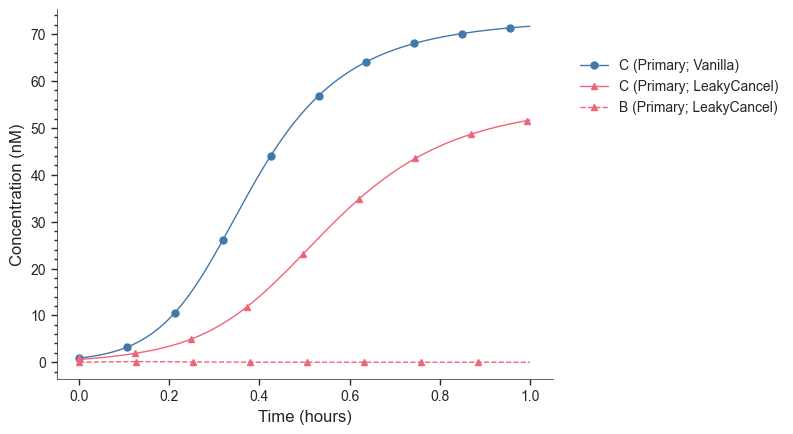

In [95]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (1.48, 0.9), 'loc':'upper right'}

index = 0
marker_index = 0

df = plot_file_advanced(f'{ROOT}/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
#                    'B': ['Br']
               },
               labels=['C (Primary; Vanilla)', 'B (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
            legendkwargs=legendkwargs,
               **kwargs)

index +=1
marker_index += 1

df = plot_file_advanced(f'{ROOT}/{FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'shC': ['shCj', 'shCk'],
               },
               labels=['C (Primary; LeakyCancel)', 'B (Primary; LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               name='leaky_shadow',
               **kwargs)

plot_savefig(BIAMP_IMAGES_DIR, 'uniamp_1em3_juxtaposed')

### RPS Revision

In [95]:
import re
FOLDER = 'rps_1em5_sameconc_pert'
PERT_DIR = f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/pert/'
PERT_IMAGES_DIR = f'{PERT_DIR}/images'
if not os.path.exists(PERT_IMAGES_DIR):
    os.makedirs(PERT_IMAGES_DIR)
kwargs = {
    'markersize' : 4,
    'markevery'  : 50,
    'linewidth'  : 1
}

In [96]:
legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'large'}

index = 0
marker_index = 0

folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'A'   : ['Ap', 'Aq'],
               'B'   : ['Br', 'Bs'],
               'C'   : ['Cj', 'Ck'],
               'shA' : ['shAp', 'shAq'],
               'shB' : ['shBr', 'shBs'],
               'shC' : ['shCj', 'shCk'],
           },
           labels=[f'A {INC}X', f'B {INC}X', f'C {INC}X', f'shA {INC}X', f'shB {INC}X', f'shC {INC}X'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
           colors=MCOLORS[:3]*2,
           markers=MARKERS[:3]*2,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

    plot_savefig(PERT_IMAGES_DIR, f'rps_1em5_pert_{INC}X')
    plt.clf()
# plot_savefig(RPS_PERT_IMAGES_DIR, f'rps_pert_1X_100X_combined')

['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', '

<Figure size 640x480 with 0 Axes>

['0', '1', '4', '9', '19', '29', '39', '49', '59', '69', '79', '89', '99']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'sh

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

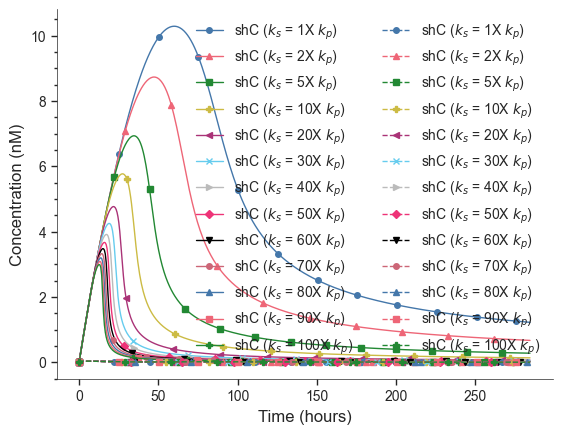

In [97]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'medium'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()
print(folders)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_nocancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['dashed'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, f'{FOLDER}_shadow_noshadow_leak_juxtaposed')

In [157]:
import re
FOLDER = 'rps_1em5_pert'
PERT_DIR = f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/pert/'
PERT_IMAGES_DIR = f'{PERT_DIR}/images'
if not os.path.exists(PERT_IMAGES_DIR):
    os.makedirs(PERT_IMAGES_DIR)
kwargs = {
    'markersize' : 4,
    'markevery'  : 50,
    'linewidth'  : 1
}

In [158]:
legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'large'}

index = 0
marker_index = 0

folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'A'   : ['Ap', 'Aq'],
               'B'   : ['Br', 'Bs'],
               'C'   : ['Cj', 'Ck'],
               'shA' : ['shAp', 'shAq'],
               'shB' : ['shBr', 'shBs'],
               'shC' : ['shCj', 'shCk'],
           },
           labels=[f'A {INC}X', f'B {INC}X', f'C {INC}X', f'shA {INC}X', f'shB {INC}X', f'shC {INC}X'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
           colors=MCOLORS[:3]*2,
           markers=MARKERS[:3]*2,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

    plot_savefig(PERT_IMAGES_DIR, f'rps_1em5_pert_{INC}X')
    plt.clf()
# plot_savefig(RPS_PERT_IMAGES_DIR, f'rps_pert_1X_100X_combined')

['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', '

<Figure size 640x480 with 0 Axes>

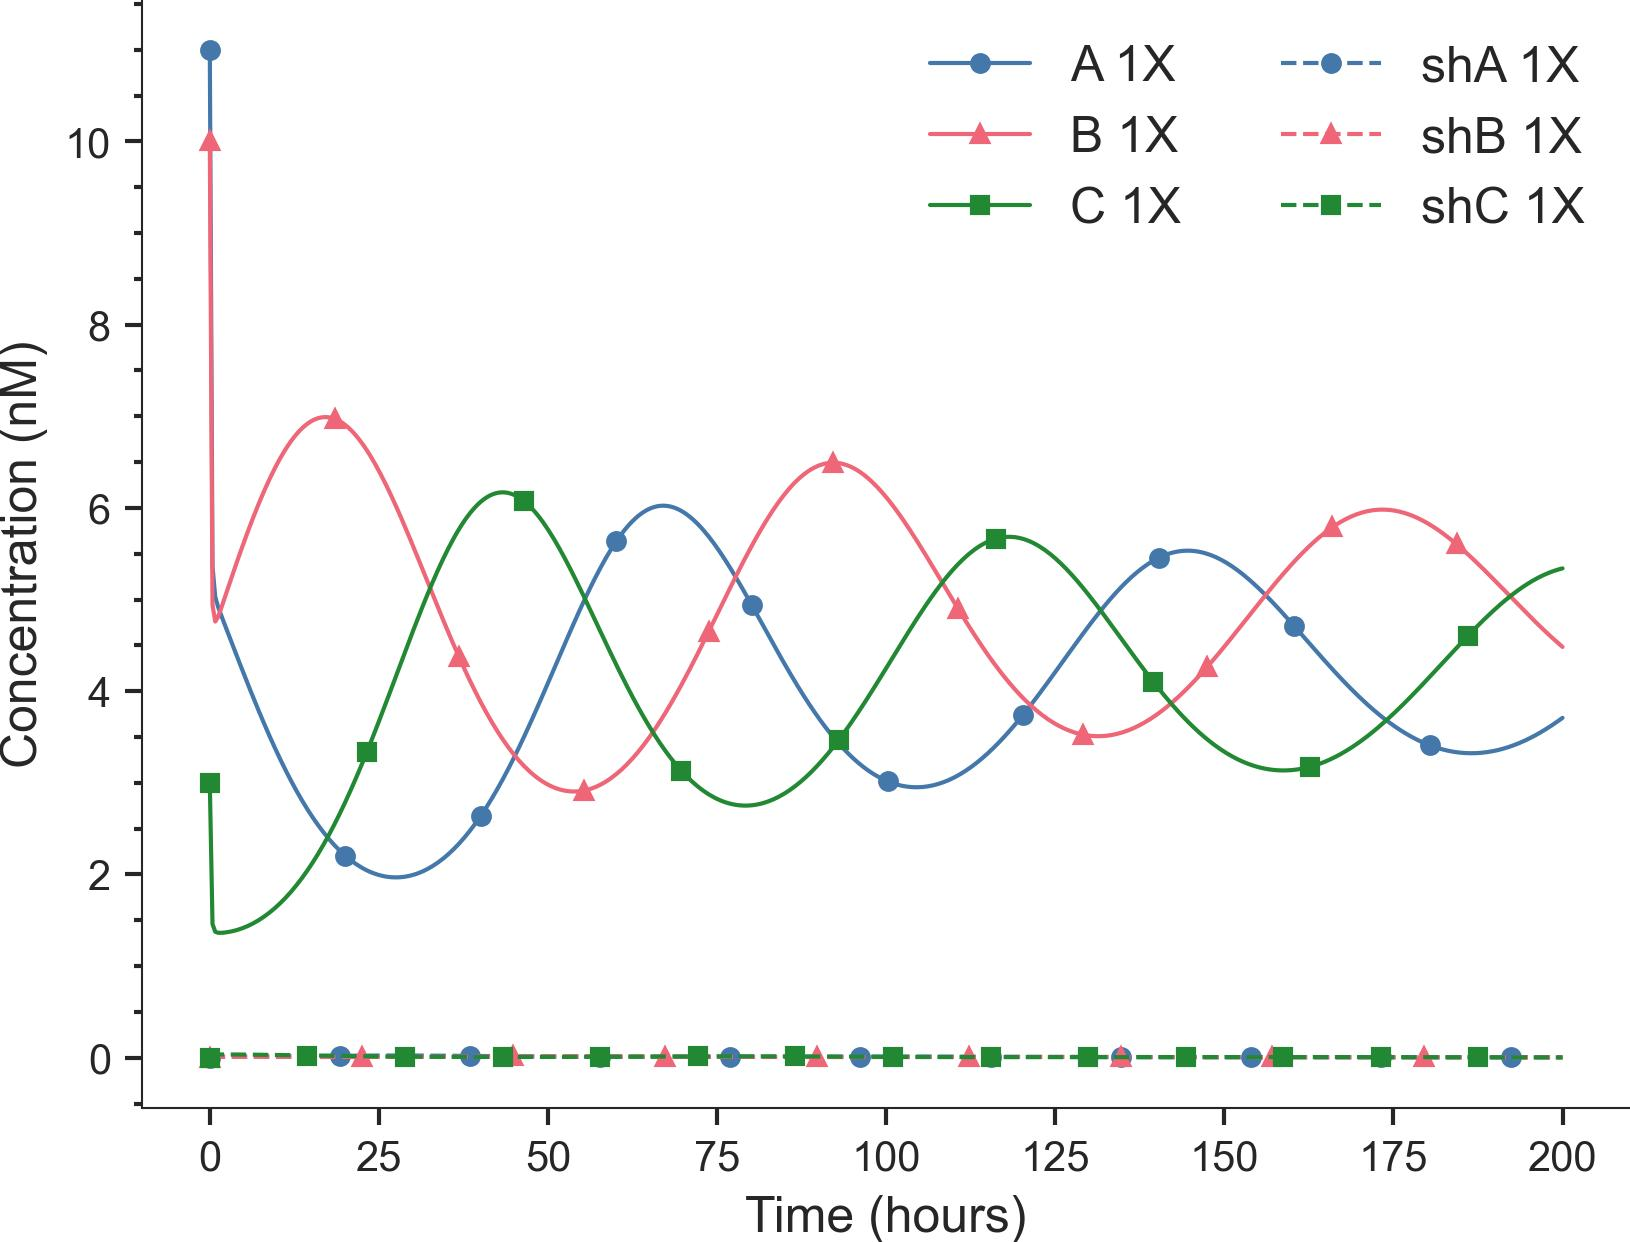

In [159]:
from PIL import Image
from IPython.display import display
img = Image.open(os.path.join(PERT_IMAGES_DIR, 'rps_1em5_pert_1X.jpg'))
display(img)

['0', '9', '19', '29', '39', '49', '59', '69', '79', '89', '99']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'Br', 'Bs', 'Ap', 'Aq', 'shBr', 'shBs', 'shAp', 'shAq', 'shCj', 'shCk']
['tim

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

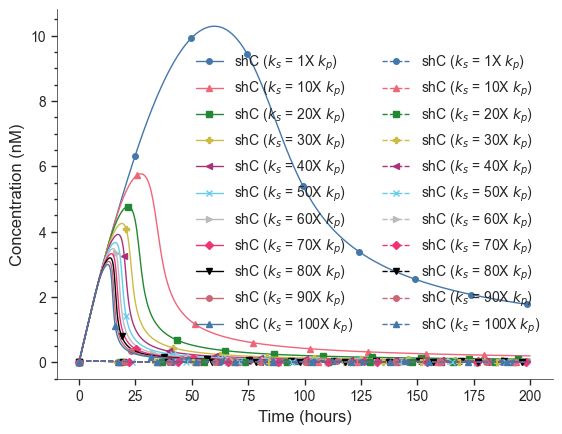

In [160]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'medium'}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()
print(folders)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_nocancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['dashed'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, f'{FOLDER}_shadow_noshadow_leak_juxtaposed')

### RPS Revision random pert

In [268]:
FOLDER = 'rps_1em4_pert'
PERT_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/pert/'
PERT_IMAGES_DIR=f'{PERT_DIR}/images'
if not os.path.exists(PERT_IMAGES_DIR):
    os.makedirs(PERT_IMAGES_DIR)
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

In [270]:
legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 18}

index = 0
marker_index = 0

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))

print(folders)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'A': ['Ap', 'Aq'],
               'B': ['Br', 'Bs'],
               'C': ['Cj', 'Ck'],
               'shA': ['shAp', 'shAq'],
               'shB': ['shBr', 'shBs'],
               'shC': ['shCj', 'shCk'],
#                'HelperC': ['CancelC'],
           },
           labels=[f'A {INC}X', f'B {INC}X', f'C {INC}X', f'shA {INC}X', f'shB {INC}X', f'shC {INC}X'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
           colors=MCOLORS[:3]*2,
           markers=MARKERS[:3]*2,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

    plot_savefig(PERT_IMAGES_DIR, f'rps_1em4_pert_{INC}X')
    plt.clf()
# plot_savefig(RPS_PERT_IMAGES_DIR, f'rps_pert_1X_100X_combined')

['0', '1', '4', '9']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


<Figure size 640x480 with 0 Axes>

['0', '1', '4', '9']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

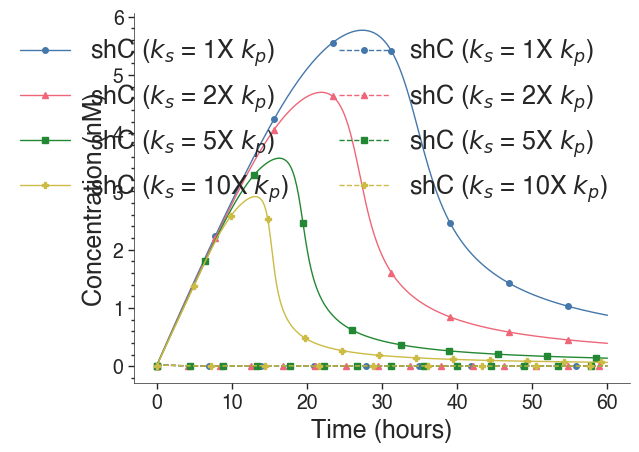

In [271]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 18}

import re
folders = [s for s in os.listdir(PERT_DIR) if re.match('[0-9]+', s) is not None] # Checked
folders.sort(key=lambda x: float(x))
fig, ax = plt.subplots()
print(folders)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_nocancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

for index, folder in enumerate(folders):
    INC = int(float(folder) + 1)
    df = plot_file_advanced(f'{PERT_DIR}/{folder}/plots/orig_shadow_pert_cancel', 
           x='time', 
           ys={
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'shC ($k_s$ = {INC}X $k_p$)'],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['dashed'],
           colors=[MCOLORS[index]]*5,
           markers=[MARKERS[index]]*5,
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           legendkwargs=legendkwargs,
           **kwargs)

plot_savefig(PERT_IMAGES_DIR, f'{FOLDER}_shadow_noshadow_leak_juxtaposed')

In [ ]:
from PIL import Image
from IPython.display import display
img = Image.open(os.path.join(PERT_IMAGES_DIR, 'rps_1em4_pert_10X.jpg'))
display(img)
# img = Image.open(os.path.join(PERT_IMAGES_DIR, 'rps_random_pert_100X.jpg'))
# display(img)

In [280]:
FOLDER='rps_1em4_pert'
SUBFOLDER='leak_pert'
LEAK_PERT_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/revision/{FOLDER}/{SUBFOLDER}'
LEAK_PERT_IMAGES_DIR=f'{LEAK_PERT_DIR}/images'
if not os.path.exists(LEAK_PERT_IMAGES_DIR):
    os.makedirs(LEAK_PERT_IMAGES_DIR)


In [284]:
kwargs = {
    'markersize': 4, 
    'markevery': 50,
    'linewidth': 1
}

legendkwargs = {'bbox_to_anchor': (0.15, 1.0), 'bbox_transform': plt.gcf().transFigure, 
                'ncols': 1, 'fontsize': 12, 'loc': 'upper left'}

folders = ['0', '200', '500', '700']

for index, LEAK in enumerate(folders):#, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'{LEAK_PERT_DIR}/{LEAK}/plots/orig_shadow_cancel', 
           x='time', 
           ys={
               'A': ['Ap', 'Aq'],
               'B': ['Br', 'Bs'],
               'C': ['Cj', 'Ck'],
               'shA': ['shAp', 'shAq'],
               'shB': ['shBr', 'shBs'],
               'shC': ['shCj', 'shCk'],
           },
           labels=[f'A ($\Delta$ Leak = {LEAK}%)', f'C ($\Delta$ Leak = {LEAK}%)', f'C ($\Delta$ Leak = {LEAK}%)',
                  '','',''],
           xlabel='Time (hours)',
           ylabel='Concentration (nM)',
           linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
           text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
           markers=MARKERS[:3] + MARKERS[:3],
           colors=MCOLORS[:3] + MCOLORS[:3],
           legendkwargs=legendkwargs,
           **kwargs)
    plot_savefig(LEAK_PERT_IMAGES_DIR, f'rps_leakpert_signal_{LEAK}')
    plt.clf()
plot_savefig(LEAK_PERT_IMAGES_DIR, f'rps_leakpert_signal')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk', 'CancelC']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk', 'CancelC']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk', 'CancelC']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk', 'CancelC']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

## Catalysis, Annihilation, and Degradation

In [61]:
FOLDER = 'control_v2'
CONTROL_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/images'
if not os.path.exists(CONTROL_IMAGES_DIR):
    os.mkdir(CONTROL_IMAGES_DIR)
kwargs = {
    'markersize': 5, 
    'markevery': 40,
    'linewidth': 1
}

['time', 'X1', 'X2', 'O1', 'O2']


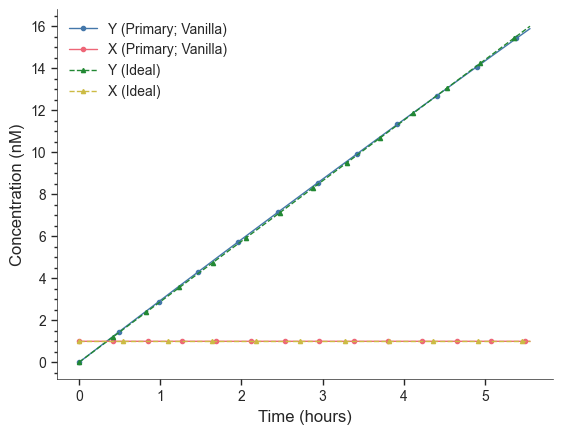

In [62]:
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r1_cat', 
               x='time', 
               ys={
                   'X2': ['X2'],
                   'X1': ['X1'],
                   'O2': ['O2'],
                   'O1': ['O1'],
               },
               labels=['Y (Primary; Vanilla)', 'X (Primary; Vanilla)', 'Y (Ideal)', 'X (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               markers=[MARKERS[0]]*2 + [MARKERS[1]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
# plt.title(r'Catalysis: $X xrightarrow[0]{k} X + Y$')
plot_savefig(CONTROL_IMAGES_DIR, 'r1_cat')

['time', 'X1', 'O1']


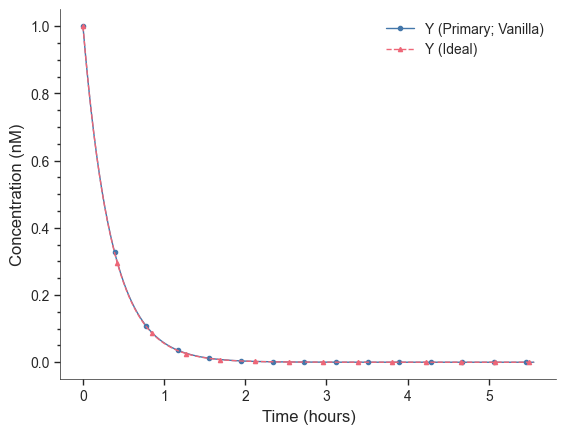

In [63]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r4_deg', 
               x='time', 
               ys={
                   'X1': ['X1'],
                   'O1': ['O1']
               },
               labels=['Y (Primary; Vanilla)', 'Y (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               markers=[MARKERS[0]] + [MARKERS[1]],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'r4_deg')

['time', 'X1', 'X2', 'O1', 'O2']


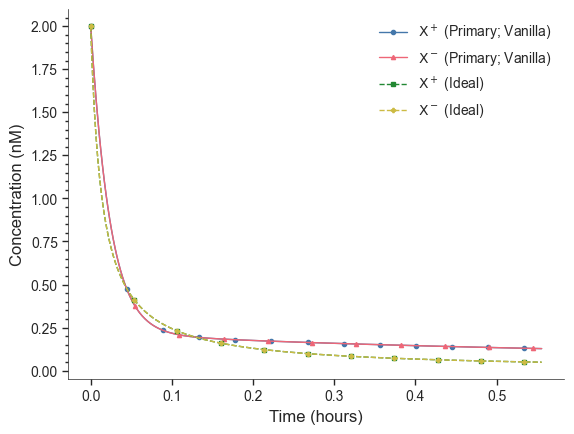

In [64]:
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r11_ann', 
               x='time', 
               ys={
                   'X2': ['X2'],
                   'X1': ['X1'],
                   'O2': ['O2'],
                   'O1': ['O1'],
               },
               labels=['$\mathrm{X^+}$ (Primary; Vanilla)', '$\mathrm{X^-}$ (Primary; Vanilla)', '$\mathrm{X^+}$ (Ideal)', '$\mathrm{X^-}$ (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
                markers=MARKERS[0:2] + MARKERS[2:4],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'r11_ann')

# Control

['time', 'Yp', 'Ideal_Yp', 'Xp', 'Ideal_Xp', 'Vp', 'Ideal_Vp', 'Rp', 'Ideal_Rp']


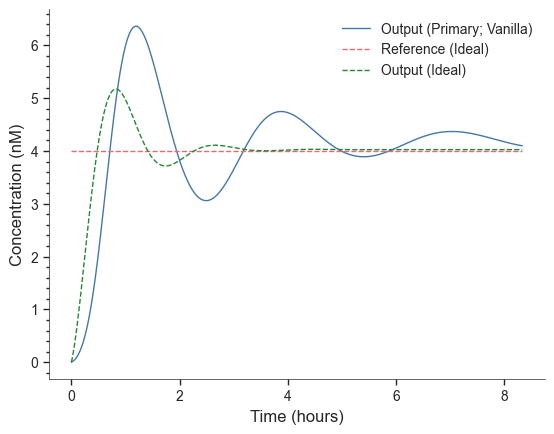

In [65]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal', 
               x='time', 
               ys={
                   'Yp': ['Yp'],
                   'Ideal_Rp': ['Ideal_Rp'],
                   'Ideal_Yp': ['Ideal_Yp']
               },
               labels=['Output (Primary; Vanilla)', 'Reference (Ideal)', 'Output (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
#                markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'original')

['time', 'Yp', 'Ideal_Yp', 'Xp', 'Ideal_Xp', 'Vp', 'Ideal_Vp', 'Rp', 'Ideal_Rp']


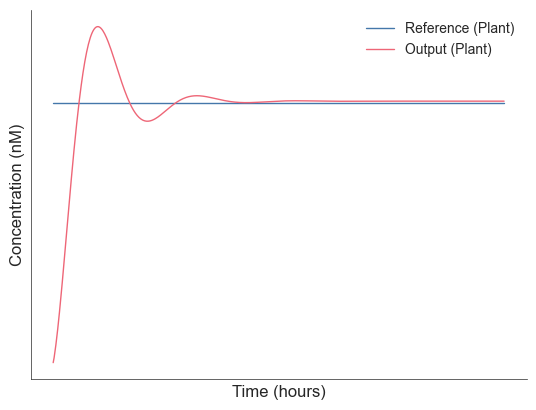

In [66]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal', 
               x='time', 
               ys={
                   'Ideal_Rp': ['Ideal_Rp'],
                   'Ideal_Yp': ['Ideal_Yp']
               },
               labels=['Reference (Plant)', 'Output (Plant)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
#                markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plt.xticks([])
plt.yticks([])
plot_savefig(CONTROL_IMAGES_DIR, 'ideal')

['time', 'Yp', 'Ideal_Yp', 'Xp', 'Ideal_Xp', 'Vp', 'Ideal_Vp', 'Rp', 'Ideal_Rp']


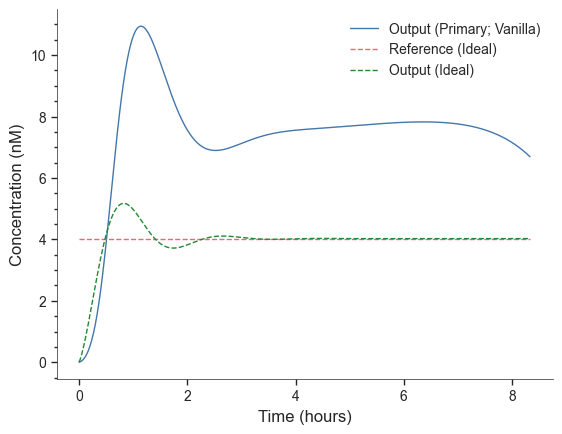

In [67]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky', 
               x='time', 
               ys={
                   'Yp': ['Yp'],
                   'Ideal_Rp': ['Ideal_Rp'],
                   'Ideal_Yp': ['Ideal_Yp']
               },
               labels=['Output (Primary; Vanilla)', 'Reference (Ideal)', 'Output (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
#                markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'leaky')

['time', 'Yp', 'Ideal_Yp', 'Xp', 'Ideal_Xp', 'Vp', 'Ideal_Vp', 'Rp', 'Ideal_Rp']


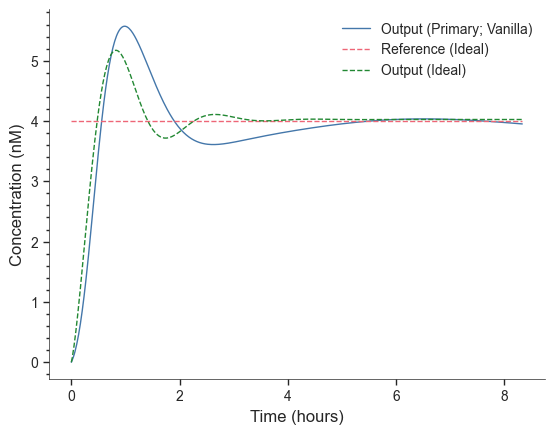

In [68]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky_shadow', 
               x='time', 
               ys={
                   'Yp': ['Yp'],
                   'Ideal_Rp': ['Ideal_Rp'],
                   'Ideal_Yp': ['Ideal_Yp']
               },
               labels=['Output (Primary; Vanilla)', 'Reference (Ideal)', 'Output (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
#                markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'leaky_cancel')

['time', 'X1', 'O1', 'X2', 'O2', 'R_NUM_Helper_1', 'R_NUM_Helper_2', 'R_NUM_React']


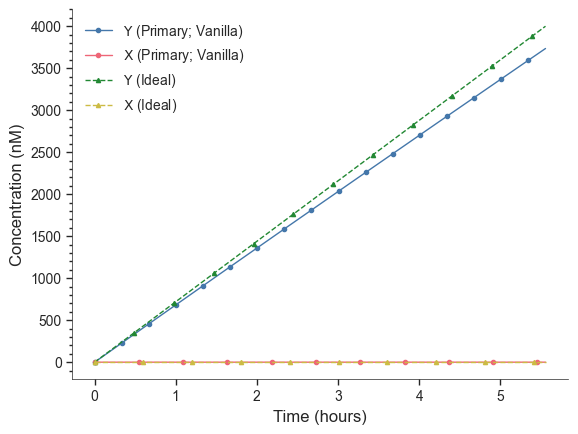

In [69]:
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r8_prod', 
               x='time', 
               ys={
                   'X2': ['X2'],
                   'X1': ['X1'],
                   'O2': ['O2'],
                   'O1': ['O1'],
               },
               labels=['$\mathrm{Y}$ (Primary; Vanilla)', '$\mathrm{X}$ (Primary; Vanilla)', '$\mathrm{Y}$ (Ideal)', '$\mathrm{X}$ (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
                markers=[MARKERS[0]]*2 + [MARKERS[1]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

plot_savefig(CONTROL_IMAGES_DIR, 'r8_prod')

['time', 'X1', 'O1']


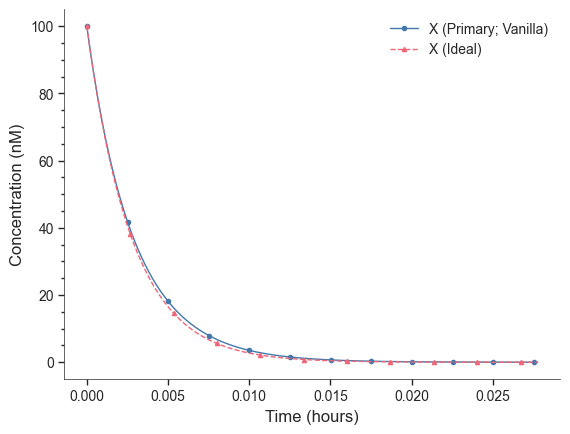

In [70]:
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r9_cons', 
               x='time', 
               ys={
                   'X1': ['X1'],
                   'O1': ['O1']
               },
               labels=['X (Primary; Vanilla)', 'X (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               markers=MARKERS[:2],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'r9_cons')

['time', 'X1', 'X2', 'O1', 'O2']


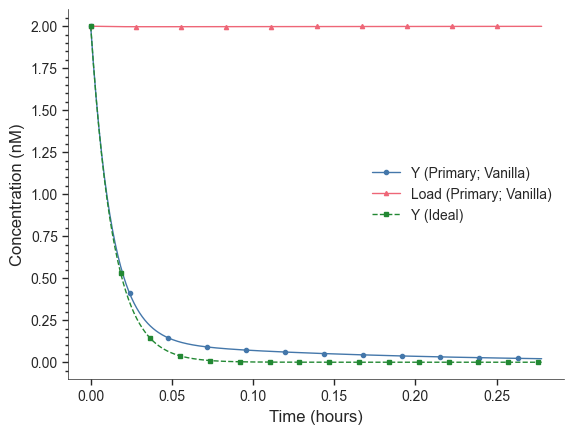

In [71]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r10_load', 
               x='time', 
               ys={
                   'X1': ['X1'],
                   'X2': ['X2'],
                   'O1': ['O1']
               },
               labels=['Y (Primary; Vanilla)', 'Load (Primary; Vanilla)', 'Y (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'r10_load')

# Leak Perturbation

In [72]:
FOLDER='biamp_pert_leak'
SUBFOLDER='pert_leak'
BIAMP_LEAK_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'
if not os.path.exists(BIAMP_LEAK_IMAGES_DIR):
    os.makedirs(BIAMP_LEAK_IMAGES_DIR)
    
kwargs = {
    'markersize': 5, 
    'markevery': 60,
    'linewidth': 1
}
    

In [73]:
print(MARKERS)

['o', '^', 's', 'P', '<', 'x', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v']


['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']


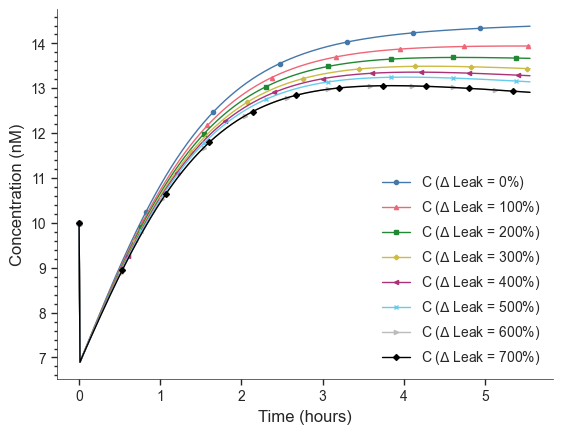

In [74]:

for index, LEAK in enumerate([0, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{LEAK}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'C': ['Cj', 'Ck'],
                   },
                   labels=[f'C ($\Delta$ Leak = {LEAK}%)', f'shC @ Leak={1 + LEAK/100}e-8 /nM/s', f'Cancel @ Leak={LEAK}e-9 /nM/s',],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   markers=[MARKERS[index]],
                   colors=[MCOLORS[index]],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
plot_savefig(BIAMP_LEAK_IMAGES_DIR, f'biamp_pert_leak')

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']


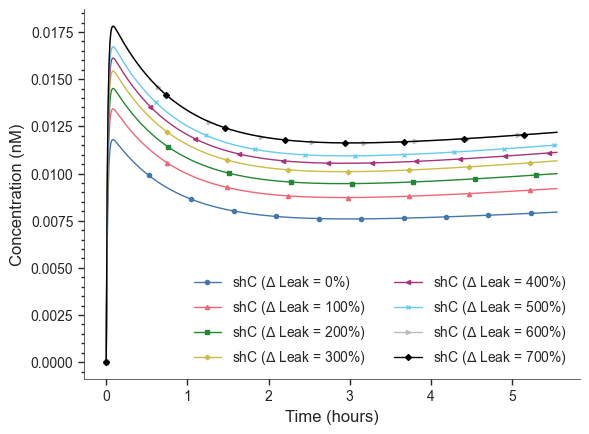

In [75]:
legendkwargs = {
    'ncols': 2,
    'loc': 'best',
    'fontsize': 'medium'
}
for index, LEAK in enumerate([0, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{LEAK}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk'], 
                   },
                   labels=[f'shC ($\Delta$ Leak = {LEAK}%)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   markers=[MARKERS[index]],
                   colors=[MCOLORS[index]],
                   legendkwargs=legendkwargs,
                   **kwargs)
plot_savefig(BIAMP_LEAK_IMAGES_DIR, f'biamp_leakactivity_leak_pert')

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'CancelC']


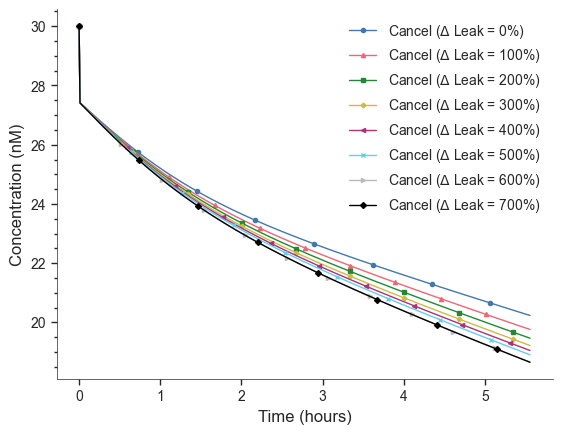

In [76]:
for index, LEAK in enumerate([0, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{LEAK}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
#                        'C': ['Cj'],
#                        'shC': ['shCj', 'shCk'], 
                        'Cancel': ['CancelC']
                   },
                   labels=[f'Cancel ($\Delta$ Leak = {LEAK}%)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   markers=[MARKERS[index]],
                   colors=[MCOLORS[index]],
                   **kwargs)
plot_savefig(BIAMP_LEAK_IMAGES_DIR, f'biamp_cancel_leak_pert')

### RPS LEAK PERT

In [77]:
FOLDER='rps_v2_pert_leak'
SUBFOLDER='pert_leak'
RPS_PERT_LEAK_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'

if not os.path.exists(RPS_PERT_LEAK_IMAGES_DIR):
    os.makedirs(RPS_PERT_LEAK_IMAGES_DIR)

kwargs = {
    'markersize': 5, 
    'markevery': 60,
    'linewidth': 1
}

In [78]:
folders = [0, 100, 200, 300, 400, 500, 600, 700]

for folder in folders:    
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{folder}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'A': ['Ap', 'Aq'],
                       'B': ['Br', 'Bs'],
                       'C': ['Cj', 'Ck'],
                   },
                   labels=[f'A ($\Delta$ Leak = {folder}%)', f'B ($\Delta$ Leak = {folder}%)', f'C ($\Delta$ Leak = {folder}%)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid'],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    
    plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, f'rps_pert_leak_{folder}')
    plt.clf()

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


<Figure size 640x480 with 0 Axes>

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


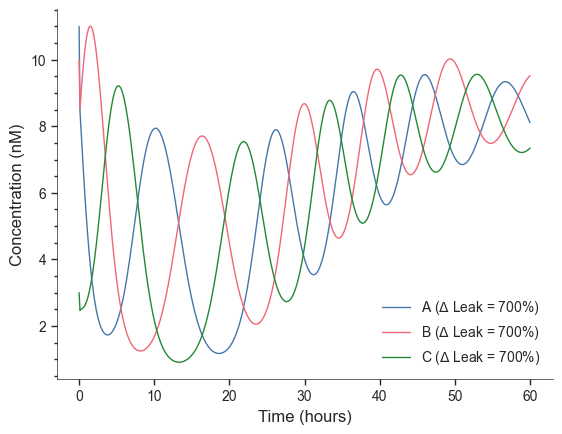

In [79]:
folders = [700]

for folder in folders:    
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{folder}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'A': ['Ap', 'Aq'],
                       'B': ['Br', 'Bs'],
                       'C': ['Cj', 'Ck'],
                   },
                   labels=[f'A ($\Delta$ Leak = {folder}%)', f'B ($\Delta$ Leak = {folder}%)', f'C ($\Delta$ Leak = {folder}%)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid'],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    
    plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, f'rps_pert_leak_{folder}')

In [80]:
FOLDER='biamp_scaleup'
BIAMP_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'

['time', 'Cj', 'Ck', 'Br', 'CancelC']


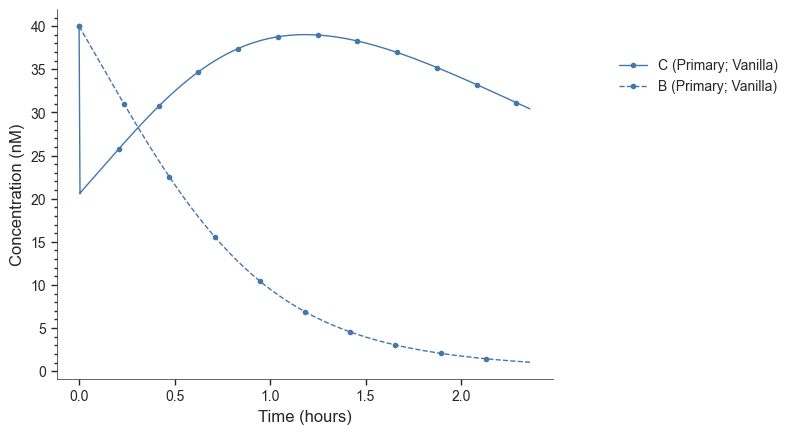

In [81]:
kwargs = {
    'markersize': 5, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (1.48, 0.9), 'loc':'upper right'}

index = 0
marker_index = 0

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/main_scaleup_10X', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br']
               },
               labels=['C (Primary; Vanilla)', 'B (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
            legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1

plot_savefig(BIAMP_IMAGES_DIR, 'biamp_scaleup_juxtaposed')

In [286]:
FOLDER='rps_v2_speed'
RPS_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

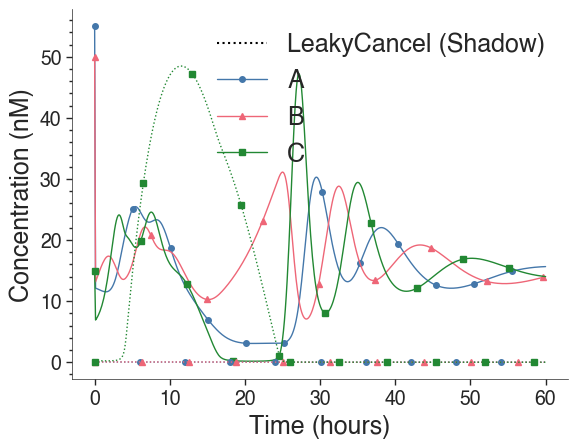

In [288]:
legendkwargs = {'ncols': 1, 'fontsize': 18, 'loc': 'best'}
# plt.plot([], [], label='LeakyCancel', linestyle='solid', color='black')
plt.plot([], [], label='LeakyCancel (Shadow)', linestyle='dotted', color='black')
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/rps_v2_speed', 
             x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],
               },
               labels=['A', 'B', 'C', 
                       '', '', ''],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
               colors=MCOLORS[:3]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=MARKERS[:3] + MARKERS[:3],
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'rps_v2_speed')